In [1]:
#general purpose libraries 
import re
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier , VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import optuna
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 300)

In [2]:
# NLTK libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sayan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sayan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sayan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sayan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sayan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [5]:
df = pd.read_csv('sample30.csv')

In [6]:
df.isna().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [7]:
df.user_sentiment.unique()

array(['Positive', 'Negative', nan], dtype=object)

In [8]:
df['user_sentiment']=df.user_sentiment.replace({'Positive':1 , 'Negative':0})

In [9]:
df['reviews_text'] = df.reviews_text.str.strip().str.lower()

In [10]:
df['word_count'] = df['reviews_text'].apply(lambda x: len(x.split()))

In [11]:
df.head(40)

id            brand  \
0   AV13O1A8GV-KLJ3akUyj  Universal Music   
1   AV14LG0R-jtxr-f38QfS         Lundberg   
2   AV14LG0R-jtxr-f38QfS         Lundberg   
3   AV16khLE-jtxr-f38VFn              K-Y   
4   AV16khLE-jtxr-f38VFn              K-Y   
5   AV16khLE-jtxr-f38VFn              K-Y   
6   AV16khLE-jtxr-f38VFn              K-Y   
7   AV16khLE-jtxr-f38VFn              K-Y   
8   AV16khLE-jtxr-f38VFn              K-Y   
9   AV16khLE-jtxr-f38VFn              K-Y   
10  AV16khLE-jtxr-f38VFn              K-Y   
11  AV16khLE-jtxr-f38VFn              K-Y   
12  AV16khLE-jtxr-f38VFn              K-Y   
13  AV16khLE-jtxr-f38VFn              K-Y   
14  AV16khLE-jtxr-f38VFn              K-Y   
15  AV16khLE-jtxr-f38VFn              K-Y   
16  AV16khLE-jtxr-f38VFn              K-Y   
17  AV16khLE-jtxr-f38VFn              K-Y   
18  AV16khLE-jtxr-f38VFn              K-Y   
19  AV16khLE-jtxr-f38VFn              K-Y   
20  AV16khLE-jtxr-f38VFn              K-Y   
21  AV16khLE-jtxr-f38VFn              K-Y   
22  AV16khLE-jtxr-f38VFn              K-Y   
23  AV16khLE-jtxr-f38VFn              K-Y   
24  AV16khLE-jtxr-f38VFn              K-Y   
25  AV16khLE-jtxr-f38VFn              K-Y   
26  AV16khLE-jtxr-f38VFn              K-Y   
27  AV16khLE-jtxr-f38VFn              K-Y   
28  AV16khLE-jtxr-f38VFn              K-Y   
29  AV16khLE-jtxr-f38VFn              K-Y   
30  AV1d76w7vKc47QAVhCqn     J.R. Watkins   
31  AV1d76w7vKc47QAVhCqn     J.R. Watkins   
32  AV1d76w7vKc47QAVhCqn     J.R. Watkins   
33  AV1d76w7vKc47QAVhCqn     J.R. Watkins   
34  AV1d76w7vKc47QAVhCqn     J.R. Watkins   
35  AV1d76w7vKc47QAVhCqn     J.R. Watkins   
36  AV1h6gSl-jtxr-f31p40             AMBI   
37  AV1h6gSl-jtxr-f31p40             AMBI   
38  AV1h6gSl-jtxr-f31p40             AMBI   
39  AV1h6gSl-jtxr-f31p40             AMBI   

                                                                                                                                                               categories  \
0          Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap   
1                                                                                            Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes   
2                                                                                            Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes   
3                                                                                   Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants   
4                                                                                   Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants   
5                                                                                   Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants   
6                                                                                   Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants   
7                                                                                   Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants   
8                                                                                   Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants   
9                                                                                   Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants   
10                                                                                  Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants   
11                                                                                  Personal Care,Me

In [12]:
df.categories[8]

'Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants'

In [13]:
df.brand.unique()

array(['Universal Music', 'Lundberg', 'K-Y', 'J.R. Watkins', 'AMBI',
       "Johnson's", 'Olay', 'Windex', 'Heinz', 'KIND', 'Pantene',
       'Aussie', 'Disney', 'CeraVe', 'Solo Foods', 'Finish',
       'Jake And The Neverland Pirates', 'Pearhead', 'No Brand',
       'Neutrogena', 'Meguiars', 'Banana Boat', 'Cetaphil', 'Suave',
       'Bumble Bee', 'Citrus Magic', 'La Tortilla Factory',
       'Target.com Use Only', 'Sea Gull Lighting', 'The Seaweed Bath Co.',
       'Way Basics', 'Biokleen', 'Yes to Carrots', 'Alberto VO5',
       'Warner Bros.', 'FOX', 'Progresso', "Herr's", 'Hawaiian Punch',
       'Moom', 'Universal Home Video', 'Holmes', 'Sony Music', 'Beanitos',
       'Baxton Studio', "Nature's Path", 'Lite Source',
       'SLOAN VALVE COMPANY', 'Nearly Natural', 'Toy Story', 'MaraNatha',
       'Chex', 'TRESemme', 'Wagan', 'Creme Of Nature', 'Arrid',
       'Eagle Brand', 'Pinaud', 'Hortense B. Hewitt', 'Canada Dry',
       'Baxter of California', 'Ragu', 'Sabra', 'Pendaflex',


In [14]:
df[df['brand']=="Starbucks"]['categories']

18065    Food & Beverage,Coffee, Tea & Cocoa,Coffee,Food,Ready to Drink Coffee,Protein Drinks,Bottled & Canned Coffee Drinks
18066    Food & Beverage,Coffee, Tea & Cocoa,Coffee,Food,Ready to Drink Coffee,Protein Drinks,Bottled & Canned Coffee Drinks
18067    Food & Beverage,Coffee, Tea & Cocoa,Coffee,Food,Ready to Drink Coffee,Protein Drinks,Bottled & Canned Coffee Drinks
20633                                                  Food & Beverage,Coffee, Tea & Cocoa,Coffee,Food,Ready to Drink Coffee
20634                                                  Food & Beverage,Coffee, Tea & Cocoa,Coffee,Food,Ready to Drink Coffee
20635                                                  Food & Beverage,Coffee, Tea & Cocoa,Coffee,Food,Ready to Drink Coffee
20636                                                  Food & Beverage,Coffee, Tea & Cocoa,Coffee,Food,Ready to Drink Coffee
Name: categories, dtype: object

In [15]:
df['main_category']=df.categories.apply(lambda x: x.split(',')[0])

In [16]:
df.main_category.unique()

array(['Movies', 'Food', 'Personal Care', 'Household Essentials', 'Home',
       'Gift Finder', 'Household Chemicals', 'Movies & TV Shows',
       'Furniture', 'Home Improvement', 'Holiday Shop', 'Party Supplies',
       'Food & Beverage', 'School & Office Supplies', 'Sports & Outdoors',
       'Health', 'Pro Audio', 'Auto & Tires', 'Office',
       'Kitchen & Dining', 'Baby', 'Featured Brands', 'Party & Occasions',
       'Patio & Garden', 'Clothing', 'Music on CD or Vinyl', 'Beauty'],
      dtype=object)

In [17]:
df['sub_category']=df.categories.apply(lambda x: x.split(',')[1])

In [18]:
df

id            brand  \
0      AV13O1A8GV-KLJ3akUyj  Universal Music   
1      AV14LG0R-jtxr-f38QfS         Lundberg   
2      AV14LG0R-jtxr-f38QfS         Lundberg   
3      AV16khLE-jtxr-f38VFn              K-Y   
4      AV16khLE-jtxr-f38VFn              K-Y   
...                     ...              ...   
29995  AVpfW8y_LJeJML437ySW    L'oreal Paris   
29996  AVpfW8y_LJeJML437ySW    L'oreal Paris   
29997  AVpfW8y_LJeJML437ySW    L'oreal Paris   
29998  AVpfW8y_LJeJML437ySW    L'oreal Paris   
29999  AVpfW8y_LJeJML437ySW    L'oreal Paris   

                                                                                                                                                           categories  \
0      Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap   
1                                                                                        Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes   
2                                                                                        Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes   
3                                                                               Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants   
4                                                                               Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants   
...                                                                                                                                                               ...   
29995                 Beauty,Hair Care,Shampoo & Conditioner,Holiday Shop,Christmas,Featured Brands,Health & Beauty,L'oreal,Personal Care,Hair Treatments,Conditioner   
29996                 Beauty,Hair Care,Shampoo & Conditioner,Holiday Shop,Christmas,Featured Brands,Health & Beauty,L'oreal,Personal Care,Hair Treatments,Conditioner   
29997                 Beauty,Hair Care,Shampoo & Conditioner,Holiday Shop,Christmas,Featured Brands,Health & Beauty,L'oreal,Personal Care,Hair Treatments,Conditioner   
29998                 Beauty,Hair Care,Shampoo & Conditioner,Holiday Shop,Christmas,Featured Brands,Health & Beauty,L'oreal,Personal Care,Hair Treatments,Conditioner   
29999                 Beauty,Hair Care,Shampoo & Conditioner,Holiday Shop,Christmas,Featured Brands,Health & Beauty,L'oreal,Personal Care,Hair Treatments,Conditioner   

                             manufacturer  \
0      Universal Music Group / Cash Money   
1                                Lundberg   
2                                Lundberg   
3                                     K-Y   
4                                     K-Y   
...                                   ...   
29995                       L'oreal Paris   
29996                       L'oreal Paris   
29997                       L'oreal Paris   
29998                       L'oreal Paris   
29999                       L'oreal Paris   

                                                                                 name  \
0                                           Pink Friday: Roman Reloaded Re-Up (w/dvd)   
1                                          Lundberg Organic Cinnamon Toast Rice Cakes   
2                                          Lundberg Organic Cinnamon Toast Rice Cakes   
3                                                    K-Y Love Sensuality Pleasure Gel   
4                                                    K-Y Love Sensuality Pleasure Gel   
...                                                                               ...   
29995  L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz   
29996  L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz   
29997  L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12

In [19]:
df.word_count.describe()

count    30000.000000
mean        34.385800
std         34.556643
min          1.000000
25%         16.000000
50%         25.000000
75%         41.000000
max       1010.000000
Name: word_count, dtype: float64

In [20]:
df.user_sentiment.value_counts()

user_sentiment
1.0    26632
0.0     3367
Name: count, dtype: int64

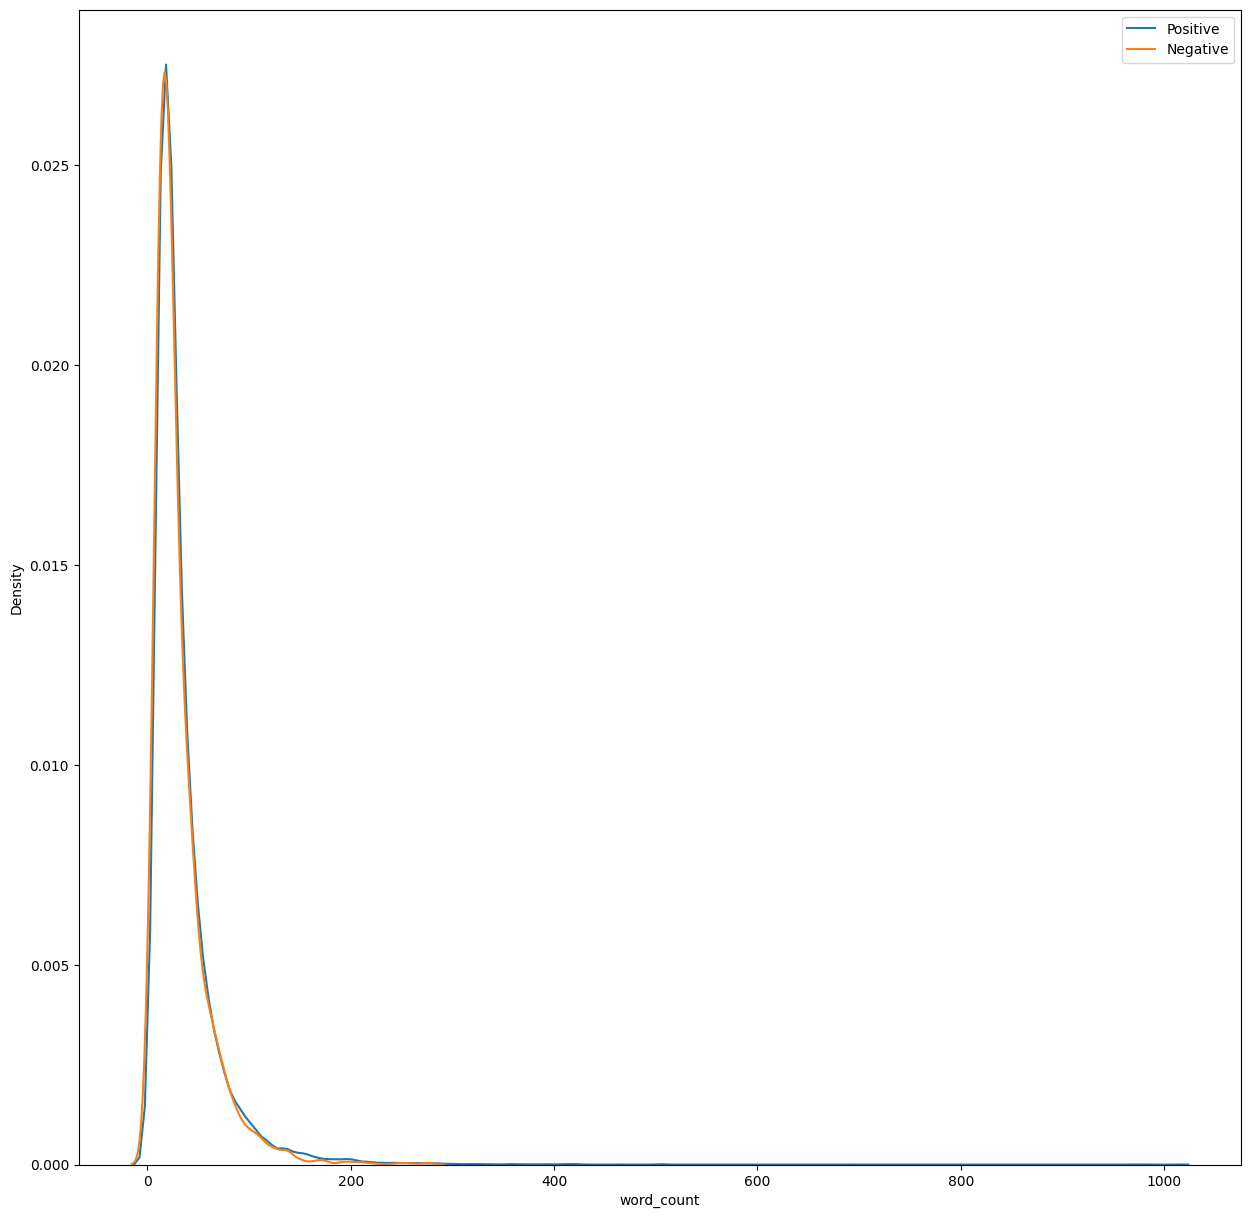

In [21]:
plt.figure(figsize=(15,15))

sns.kdeplot(df[df['user_sentiment']==1]['word_count'],label='Positive')

sns.kdeplot(df[df['user_sentiment']==0]['word_count'],label='Negative')
plt.legend()

<Axes: xlabel='user_sentiment', ylabel='word_count'>

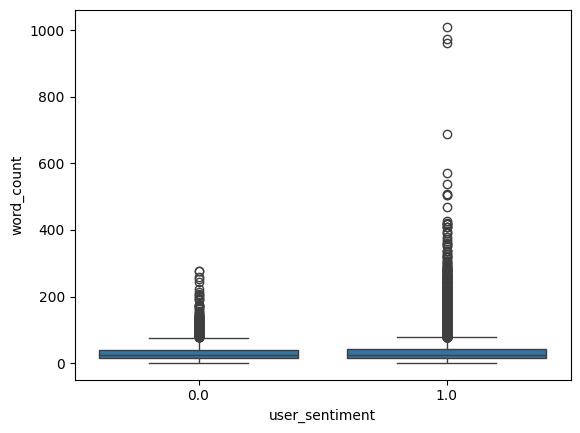

In [22]:
sns.boxplot(x=df['user_sentiment'],y=df['word_count'])

In [23]:
df[['reviews_title','reviews_text']]

reviews_title  \
0                     Just Awesome   
1                             Good   
2                             Good   
3                     Disappointed   
4                       Irritation   
...                            ...   
29995                   Softness!!   
29996                    I love it   
29997  Hair is so smooth after use   
29998    Perfect for my oily hair!   
29999     Conditioned into healthy   

                                                                                                                                                                                                                                                                                                      reviews_text  
0                                                                                                        i love this album. it's very good. more to the hip hop side than her current pop sound.. so hype! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.  
1                                                                                                                                                                                                                                                   good flavor. this review was collected as part of a promotion.  
2                                                                                                                                                                                                                                                                                                     good flavor.  
3      i read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews i had read. for starters, neither my boyfriend nor i could notice any sort of enhanced or 'captivating' sensation. what we did ...  
4                                                                                                                                                                             my husband bought this gel for us. the gel caused irritation and it felt like it was burning my skin. i wouldn't recommend this gel.  
...                                                                                                                                                                                                                                                                                                            ...  
29995                                                                               i got this conditioner with influenster to try it and im loving it so far, i have oily hair so i use it only in the ends of my hair and feels amazing, so soft and no mess!! this review was collected as part of a promotion.  
29996                                                                                                                                                                                      i love it , i received this for review purposes from influenster and it leaves my hair feeling fresh and smelling great  
29997                                                   first of all i love the smell of this product. after you wash your hair it is so smooth and easy to brush! i did receive this product from influenster for testing purposes but all opinions are my own! this review was collected as part of a promotion.  
29998  i received this through influenster and will never go back to anything else! i normally don't use conditioner because my hair is so oily and fine. this does not make my hair feel heavy, and it doesn't get oily during the day! it really is fantastic and plan on buying it in the future! this revie...  
29999                             i received this product complimentary from influenster and it has really saved my hair. this product really gives the extra boost o

In [24]:
#Let's combine the reviews_text and reviews_title for better analysis
df["reviews_title"] = df["reviews_title"].fillna('')
df["reviews_full_text"] = df[['reviews_title', 'reviews_text']].agg('. '.join, axis=1).str.lstrip('. ')

In [25]:
df[['reviews_title','reviews_text','reviews_full_text']]

reviews_title  \
0                     Just Awesome   
1                             Good   
2                             Good   
3                     Disappointed   
4                       Irritation   
...                            ...   
29995                   Softness!!   
29996                    I love it   
29997  Hair is so smooth after use   
29998    Perfect for my oily hair!   
29999     Conditioned into healthy   

                                                                                                                                                                                                                                                                                                      reviews_text  \
0                                                                                                        i love this album. it's very good. more to the hip hop side than her current pop sound.. so hype! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.   
1                                                                                                                                                                                                                                                   good flavor. this review was collected as part of a promotion.   
2                                                                                                                                                                                                                                                                                                     good flavor.   
3      i read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews i had read. for starters, neither my boyfriend nor i could notice any sort of enhanced or 'captivating' sensation. what we did ...   
4                                                                                                                                                                             my husband bought this gel for us. the gel caused irritation and it felt like it was burning my skin. i wouldn't recommend this gel.   
...                                                                                                                                                                                                                                                                                                            ...   
29995                                                                               i got this conditioner with influenster to try it and im loving it so far, i have oily hair so i use it only in the ends of my hair and feels amazing, so soft and no mess!! this review was collected as part of a promotion.   
29996                                                                                                                                                                                      i love it , i received this for review purposes from influenster and it leaves my hair feeling fresh and smelling great   
29997                                                   first of all i love the smell of this product. after you wash your hair it is so smooth and easy to brush! i did receive this product from influenster for testing purposes but all opinions are my own! this review was collected as part of a promotion.   
29998  i received this through influenster and will never go back to anything else! i normally don't use conditioner because my hair is so oily and fine. this does not make my hair feel heavy, and it doesn't get oily during the day! it really is fantastic and plan on buying it in the future! this revie...   
29999                             i received this product complimentary from influenster and it has really saved my hair. this product really gives the ex

In [26]:
df['reviews_full_text'] = df.reviews_full_text.str.strip().str.lower()

In [27]:
from nltk.corpus import stopwords
import nltk
#nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['num_stop_words']=df['reviews_full_text'].apply(lambda x: len([word for word in x.split() if word in stop_words]))
            

In [28]:
df.shape

(30000, 20)

<Axes: xlabel='user_sentiment', ylabel='num_stop_words'>

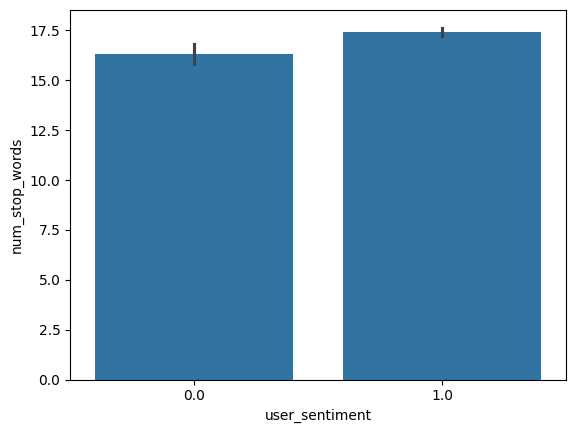

In [29]:
sns.barplot(x=df['user_sentiment'],y=df['num_stop_words'])

<Axes: xlabel='count', ylabel='stop_word'>

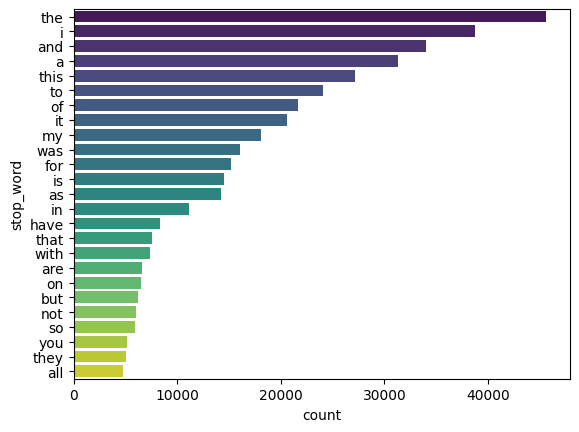

In [30]:
from collections import Counter

all_stop_word = []
for text in df['reviews_full_text']:
    words = str(text).split()  # convert to string in case of NaN
    for word in words:
        if word.lower() in stop_words:
            all_stop_word.append(word.lower())

            
most_common_stop_word = Counter(all_stop_word).most_common(25)
top25_df = pd.DataFrame(most_common_stop_word,columns=['stop_word','count'])

sns.barplot(top25_df,x='count',y='stop_word',palette='viridis')

In [31]:
all_text = ' '.join(df['reviews_full_text'])

In [32]:
all_text

'just awesome. i love this album. it\'s very good. more to the hip hop side than her current pop sound.. so hype! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy. good. good flavor. this review was collected as part of a promotion. good. good flavor. disappointed. i read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn\'t even live up to the reviews i had read. for starters, neither my boyfriend nor i could notice any sort of enhanced or \'captivating\' sensation. what we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. it was difficult to clean up, and was not a pleasant, especially since it lacked the \'captivating\' sensation we had both been expecting. i\'m disappointed that i paid as much as i did for a lube that i won\'t use again, when i could just use their normal personal lubricant for 1) less 

In [33]:
freq_text = Counter(all_text)
text_df = pd.DataFrame(freq_text.items(),columns=['character','frequency'])

In [34]:
text_df.value_counts()  # we see there are occurence of special characters

character  frequency
           1127141      1
f          100483       1
l          227883       1
k          45446        1
j          7453         1
                       ..
=          9            1
>          4            1
?          492          1
@          3            1
~          6            1
Name: count, Length: 69, dtype: int64

In [35]:
text_df[text_df['character']=='.'] 

character  frequency
10         .     109546

In [36]:
df['num_punc_char2']=df['reviews_full_text'].apply(lambda x: sum([1 for char in x if char in '.,!?;:\(){}[]-=']))

In [37]:
df.num_punc_char2.unique()

array([  9,   3,   2,  16,   4,   7,   6,   1,   5,  15,  14,  25,  11,
        22,  10,   8,  29,  12,  13,  18,  17,  23,  19,  21,  20,  27,
        35,  26,  28,   0,  24,  38,  30,  42,  48, 112,  33,  34,  32,
        52,  62,  49,  45,  39,  74,  64,  40,  36,  47,  60,  37,  31,
        77,  58, 134,  54, 227, 136,  43,  85,  75,  41,  59,  46,  44,
        63, 113,  61,  65,  51,  70,  88,  72,  50,  71,  56,  69],
      dtype=int64)

In [38]:
import re
df['reviews_full_text']=df['reviews_full_text'].apply(lambda x: re.sub('\.|\,|\!|\?|\;|\:|\"|\[\]|\'|\(|\)|\{|\}|\[|\]|\-|\=|\/','',x))

<Axes: xlabel='count', ylabel='bigram'>

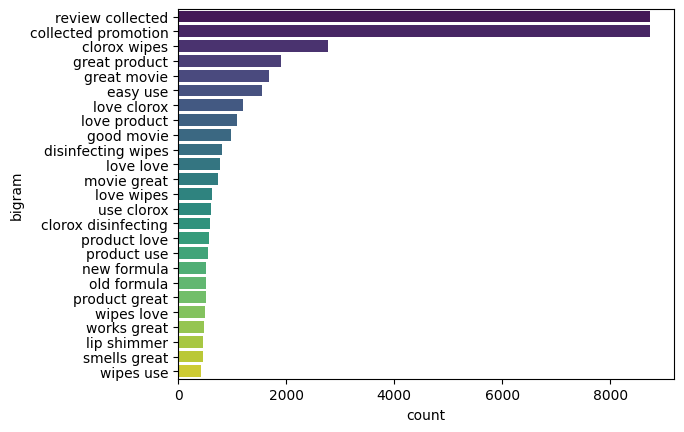

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_bigrams(corpus, n, ngram_range=(2,2)):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

top25_bigrams = get_top_bigrams(df['reviews_full_text'], 25, ngram_range=(2,2))
top25_bigrams_df = pd.DataFrame(top25_bigrams,columns=['bigram','count'])

sns.barplot(top25_bigrams_df,x='count',y='bigram',palette='viridis')

<Axes: xlabel='count', ylabel='trigram'>

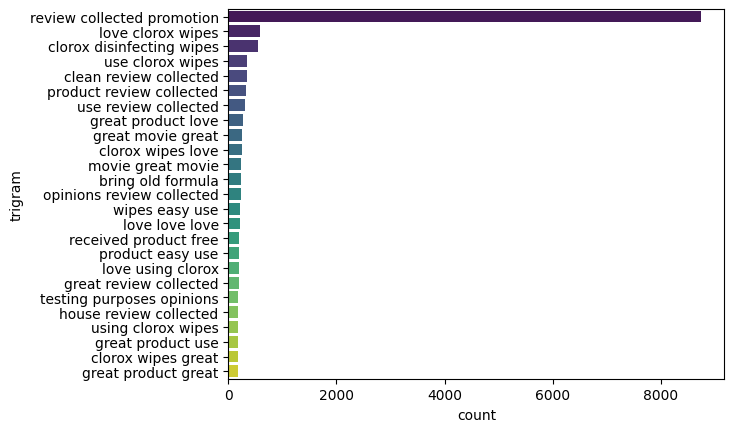

In [40]:
def get_top_trigrams(corpus, n, ngram_range=(3,3)):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

top25_trigrams = get_top_trigrams(df['reviews_full_text'], 25, ngram_range=(3,3))
top25_trigrams_df = pd.DataFrame(top25_trigrams,columns=['trigram','count'])

sns.barplot(top25_trigrams_df,x='count',y='trigram',palette='viridis')

In [41]:
df.dropna(subset=['user_sentiment'],inplace=True)

In [42]:
df[df['user_sentiment']==0]['reviews_rating'].describe()

count    3367.000000
mean        3.871993
std         1.537589
min         1.000000
25%         3.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: reviews_rating, dtype: float64

In [43]:
df[df['user_sentiment']==1]['reviews_rating'].describe()

count    26632.000000
mean         4.560378
std          0.865194
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: reviews_rating, dtype: float64

In [44]:
df[(df['user_sentiment']==0)&(df['reviews_rating']>=4)][['reviews_title','reviews_text','reviews_rating']]

reviews_title  \
92                            hydrating but not too heavy   
96     This product has made a real difference on my skin   
100               Noticed a difference in just two weeks!   
106                                       Very rich cream   
117                                            Not greasy   
...                                                   ...   
29818                                       Great Product   
29855                                               Great   
29858    Makes my hair soft and shiny without excess oil!   
29862                                   Great Conditioner   
29941     Good for keeping combination hair under control   

                                                                                                                                                                                                                                                                                                      reviews_text  \
92                                                                                                                                                                                          it hydrates my skin. it is not too thick and heavy when i put it on. this review was collected as part of a promotion.   
96                                                                                                                                                                                                in only a week i can see the difference in my skin on my face. this review was collected as part of a promotion.   
100                                                                                                                                               this product has made my skin smoother and supple after only two weeks. it absorbs well and leaves no residue. this review was collected as part of a promotion.   
106                                                                                                               i like to use this cream on my neck and collarbone to help keep my skin well moisturized, but it can be a little heavy for the skin on my face this review was collected as part of a promotion.   
117                                                     i finally found a moisturizing product that will absorb completely and not leave my skin feeling like it's suffocating. i apply it, and it feels like there is nothing there but my skin looks smoother. this review was collected as part of a promotion.   
...                                                                                                                                                                                                                                                                                                            ...   
29818  i received a complimentary sample of this product and it worked so well for my hair! i have very thick hair so my roots always get oily and my ends are dry, this left my hair the cleanest it's felt in a long time. will def recommend this to my family and friends! this review was collected as par...   
29855                                                                                                                                     this has prolonged the color in my hair! not only is my hair healthier but i think i'll have to visit my stylist less! this review was collected as part of a promotion.   
29858  this conditioner makes my hair very soft without weighing it down! i was afraid it'd make my roots more oily and weight them down, but it doesn't one bit! my hair is colored, and it hasn't faded out the color either! i'd highly recommend giving this a try! this review was collected as part of a ...   
29862                                                                                                                                                                                                    this condi

In [45]:
df[(df['user_sentiment']==1)&(df['reviews_rating']<4)][['reviews_title','reviews_text','reviews_rating']]

reviews_title  \
9                       Don't buy   
11                 Waste of Money   
14                   Disappointed   
18                    Pretty nice   
54        New formula is terrible   
...                           ...   
29050  Didn't Do Much For Dryness   
29051                Not the best   
29053           clay conditioning   
29054                          Eh   
29055                   Just Okay   

                                                                                                                                                                                                                                                                                                      reviews_text  \
9                                                                                                                                       got as a surprise for my husband there is nothing special about it just a lube save the money and get plain ky if you just need a lube wish i could return it for a refund   
11                                                                                                                                                                                    purchased this thinking it would have some sort of warming effect but it's the same as the original. don't waste your money.   
14                                                                                                                                    first time purchase of this type of product. maybe i expected too much. did not think there was any warming feeling at all. left us sticky! even after trying to was it off.   
18                                                                                 i bought this because it had better reviews than the his and hers jelly, but i feel like it didn't work that well for us. it was kind of warm-feeling, but that's about it. i guess i don't know what's supposed to happen! lol   
54                                          i used (and loved) this product for several years until they changed it. it used to moisturize my skin and left it feeling soft. now, it sits on top of my skin and is never absorbed. it just leaves a slimy film on my skin. i will no longer purchase this product.   
...                                                                                                                                                                                                                                                                                                            ...   
29050  i received this product from influenster. i absolutely love the whole system together, it made my hair oil-free for 48 hours. but i expected the conditioner to do more for the dryness at the ends of my hair like advertised. i didn't really notice much of a different in dryness before and after i...   
29051  i used this product for a month straight before reviewing it and i'm not really all that impressed. my hair still gets pretty oily, my ends are still dry.... i mean it cleaned my hair i guess. it's nothing spectacular really. it didn't make my hair extremely soft but it didn't make my hair feel ...   
29053                                                                                                                                              got this item as a compliment from influenster but it really made my hair smooth and shining after the usage. this review was collected as part of a promotion.   
29054  i am not in love with the conditioner. the clay mask and shampoo are great but i didn't feel like this did anything for my ends. i would buy the other two, but not this, probably because i have fine hair and my ends need deep conditioning. smells great though! i got this product free for testing...   
29055  this conditioner didn't wow me as much as the mask and shampoo of the line did. the conditioner wasn't of a very thick consistency, which i prefer for conditi

In [46]:
# we see there are some mistakes , where user sentiment is positive bu the rating is above 4 and vice versa , so we modify it
df.loc[df[(df['user_sentiment']==0)&(df['reviews_rating']>=4)].index,'user_sentiment']=1

In [47]:
df.loc[df[(df['user_sentiment']==1)&(df['reviews_rating']<4)].index,'user_sentiment']=0

<Axes: ylabel='brand'>

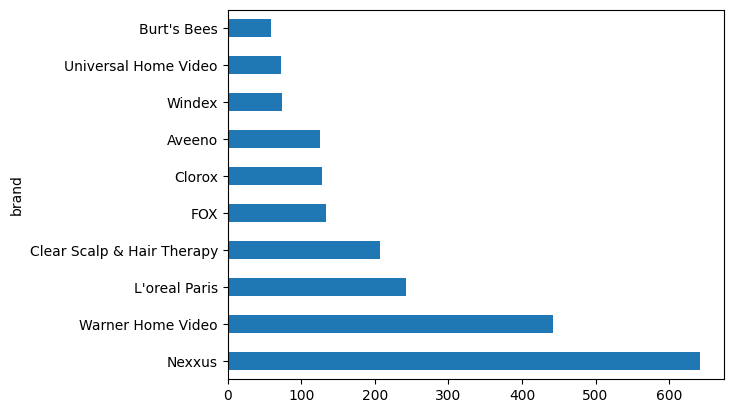

In [48]:
df[df['user_sentiment']==0]['brand'].value_counts()[:10].plot(kind='barh')

<Axes: ylabel='brand'>

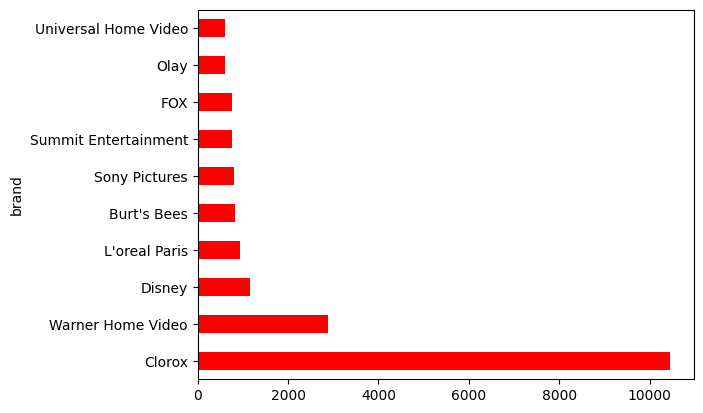

In [49]:
df[df['user_sentiment']==1]['brand'].value_counts()[:10].plot(kind='barh',color='red')

In [50]:
def filter_products(productId, pos):
    review_count = df[(df.id==productId) & (df.user_sentiment==pos)]['brand'].count()
    return review_count

In [51]:
#group the dataframe by product id and view the # of pos review / neg reviews count
df_custom =  df.groupby('id', as_index=False)['user_sentiment'].count()
df_custom["pos_review_count"] =  df_custom.id.apply(lambda id: filter_products(id, 1))
df_custom["neg_review_count"] =  df_custom.id.apply(lambda id: filter_products(id, 0))

In [52]:
df_custom

id  user_sentiment  pos_review_count  neg_review_count
0    AV13O1A8GV-KLJ3akUyj               1                 1                 0
1    AV14LG0R-jtxr-f38QfS               2                 2                 0
2    AV16khLE-jtxr-f38VFn              27                10                17
3    AV1YGDqsGV-KLJ3adc-O             348               274                74
4    AV1YIch7GV-KLJ3addeG               1                 1                 0
..                    ...             ...               ...               ...
266  AVpfthSailAPnD_xg3ON               7                 6                 1
267  AVpftikC1cnluZ0-p31V             264               224                40
268  AVpftymALJeJML43CZ6y               1                 1                 0
269  AVpfv4TlilAPnD_xhjNS               3                 2                 1
270  AVpfvieo1cnluZ0-qdnu              23                11                12

[271 rows x 4 columns]

In [53]:
#sort the product by sentiment % - postive reviews / total number of reviews
df_custom['sentiment %'] = np.round((df_custom['pos_review_count']/df_custom['user_sentiment'])*100,2)
df_custom.sort_values(by='sentiment %', ascending=False)[:20]

id  user_sentiment  pos_review_count  neg_review_count  \
0    AV13O1A8GV-KLJ3akUyj               1                 1                 0   
82   AVpf-lMV1cnluZ0-ub0_               4                 4                 0   
138  AVpfE5UF1cnluZ0-dY1N               2                 2                 0   
141  AVpfEqFbilAPnD_xUV28               4                 4                 0   
143  AVpfErGsLJeJML431yRX               1                 1                 0   
145  AVpfFGqP1cnluZ0-ddjG               1                 1                 0   
149  AVpfGRUHilAPnD_xU5nU               5                 5                 0   
150  AVpfGTRQLJeJML432WYA               8                 8                 0   
151  AVpfG_ujilAPnD_xVI8L               8                 8                 0   
153  AVpfH2Rx1cnluZ0-eYtu               3                 3                 0   
157  AVpfIGFeLJeJML4328YR               5                 5                 0   
158  AVpfIN84LJeJML432_D9               1                 1                 0   
159  AVpfIOoV1cnluZ0-ehGp               5                 5                 0   
161  AVpfIvbgLJeJML433Kph              23                23                 0   
166  AVpfKa3uilAPnD_xWSGx               1                 1                 0   
168  AVpfKhuv1cnluZ0-fSVr               1                 1                 0   
169  AVpfL-z9ilAPnD_xWzE_               2                 2                 0   
137  AVpfDiTDLJeJML431Y21               4                 4                 0   
1    AV14LG0R-jtxr-f38QfS               2                 2                 0   
134  AVpfD_NRilAPnD_xUG56               2                 2                 0   

     sentiment %  
0          100.0  
82         100.0  
138        100.0  
141        100.0  
143        100.0  
145        100.0  
149        100.0  
150        100.0  
151        100.0  
153        100.0  
157        100.0  
158        100.0  
159        100.0  
161        100.0  
166        100.0  
168        100.0  
169        100.0  
137        100.0  
1          100.0  
134        100.0

In [54]:
df[['reviews_full_text','user_sentiment']].sample(10)

reviews_full_text  \
13253                                                                         smells so fresh i love that clorox has been around for a long time and still does a great job in disinfecting and whitening at the same time plus it is a good value for the budget this review was collected as part of a promotion   
168    soft skin i have been having problems with dry skin around my chin area i typically have dry skin anyway and wanted to try this product after using numerous other products that do not seem to help it took about a week before i started noticing any difference plus taking extra care on how i clean...   
8029                                                                                                                                                                               worth it love these they clean up my childrens messes with little to no effort this review was collected as part of a promotion   
18900                                                                                                                                                                                                                                  work wonders works big messes including greasy messes it cuts right through   
14353                                                                                                                                                                     love clorox thank you clorox for making great wipes that clean and are super convenient this review was collected as part of a promotion   
12029                                                                                                                                                                                clorox wipes clorox wipes are great they are so convenient and clean so well this review was collected as part of a promotion   
19322                                                                                                                                                                             this product is awesome they are so easy to use and smell great i love that they kill germs and my kids can help me use them too   
1293                                                                                                                                          great product this car wash is a great product i am very pleased it gets my truck clean and is streak and spot free i use a shammy to wipe down windowa are spotless   
25820                                                                                                                                                                                             must watch we used it as a door prize for our luncheon the person who won it was so happy he son want that movie   
14048                                                                                                                     i love these wipes a staple in my home i love these wipes and since they have improved the formula they can wipe any surface no streaks this review was collected as part of a promotion   

       user_sentiment  
13253             1.0  
168               1.0  
8029              1.0  
18900             1.0  
14353             1.0  
12029             1.0  
19322             1.0  
1293              1.0  
25820             1.0  
14048             1.0

In [55]:
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [56]:
stop_words = set(stopwords.words('english'))

def remove_stopword(text):
    words = [word for word in text.split() if word.isalpha() and word not in stop_words]
    return " ".join(words)

In [57]:
lemmatizer = WordNetLemmatizer()
# Lemmatize the sentence
def lemma_text(text):
    word_pos_tags = nltk.pos_tag(word_tokenize(remove_stopword(text))) # Get position tags
    # Map the position tag and lemmatize the word/token
    words =[lemmatizer.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] 
    return " ".join(words)

In [58]:
df["reviews_full_text"] = df.reviews_full_text.apply(lambda x: lemma_text(x))

In [59]:
df_clean = df[['id','name','reviews_text','reviews_full_text','user_sentiment']]

In [59]:
df_clean

id  \
0      AV13O1A8GV-KLJ3akUyj   
1      AV14LG0R-jtxr-f38QfS   
2      AV14LG0R-jtxr-f38QfS   
3      AV16khLE-jtxr-f38VFn   
4      AV16khLE-jtxr-f38VFn   
...                     ...   
29995  AVpfW8y_LJeJML437ySW   
29996  AVpfW8y_LJeJML437ySW   
29997  AVpfW8y_LJeJML437ySW   
29998  AVpfW8y_LJeJML437ySW   
29999  AVpfW8y_LJeJML437ySW   

                                                                                 name  \
0                                           Pink Friday: Roman Reloaded Re-Up (w/dvd)   
1                                          Lundberg Organic Cinnamon Toast Rice Cakes   
2                                          Lundberg Organic Cinnamon Toast Rice Cakes   
3                                                    K-Y Love Sensuality Pleasure Gel   
4                                                    K-Y Love Sensuality Pleasure Gel   
...                                                                               ...   
29995  L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz   
29996  L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz   
29997  L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz   
29998  L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz   
29999  L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz   

                                                                                                                                                                                                                                                                                                      reviews_text  \
0                                                                                                        i love this album. it's very good. more to the hip hop side than her current pop sound.. so hype! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.   
1                                                                                                                                                                                                                                                   good flavor. this review was collected as part of a promotion.   
2                                                                                                                                                                                                                                                                                                     good flavor.   
3      i read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews i had read. for starters, neither my boyfriend nor i could notice any sort of enhanced or 'captivating' sensation. what we did ...   
4                                                                                                                                                                             my husband bought this gel for us. the gel caused irritation and it felt like it was burning my skin. i wouldn't recommend this gel.   
...                                                                                                                                                                                                                                                                                                            ...   
29995                                                                               i got this conditioner with influenster to try it and im loving it so far, i have oily hair so i use it only in the ends of my hair and feels amazing, so soft and no mess!! this review was collected as part of a promotion.   
29996                                                                                                  

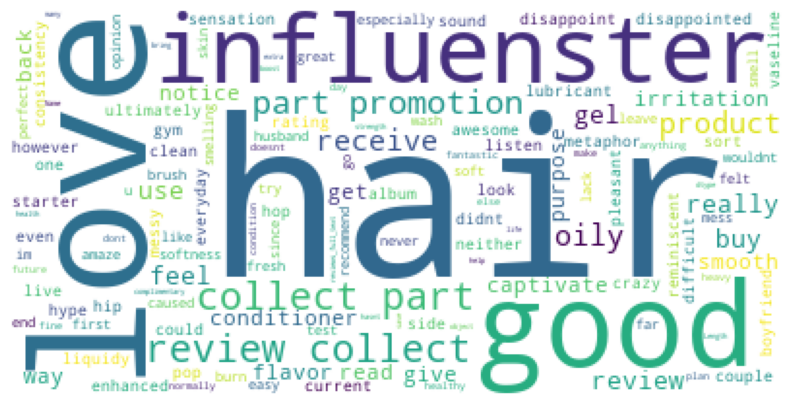

In [60]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
from wordcloud import WordCloud
wordcloud = WordCloud(stopwords=stop_words,max_words=200,background_color='white').generate(str(df_clean.reviews_full_text))

print(wordcloud)
plt.figure(figsize= (10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

In [61]:
from collections import Counter


def common_word_sentiment(n,n_common_word):
    all_word = []
    for text in df[df['user_sentiment']==n]['reviews_full_text']:
        words = str(text).split()  # convert to string in case of NaN
        for word in words:
            all_word.append(word)         
    most_common_word = Counter(all_word).most_common(n_common_word)
    top25_df = pd.DataFrame(most_common_word,columns=['word','count'])
    return top25_df,sns.barplot(top25_df,x='count',y='word',palette='viridis')

(        word  count
 0      great  14416
 1       love  12466
 2        use  11757
 3    product  10826
 4      movie   9862
 5     review   8880
 6       part   8732
 7  promotion   8375
 8       wipe   8204
 9      clean   8109,
 <Axes: xlabel='count', ylabel='word'>)

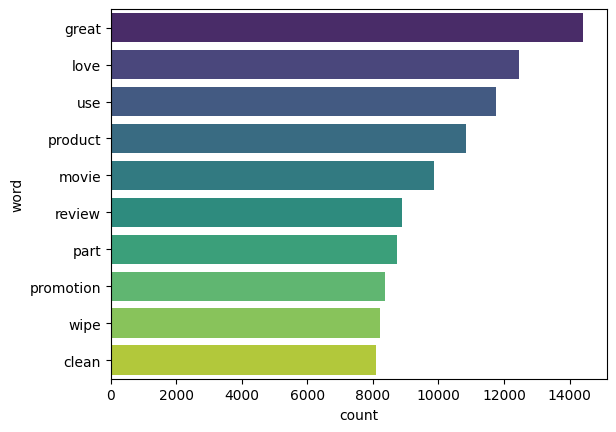

In [62]:
common_word_sentiment(1,10)

(      word  count
 0  product   1941
 1      use   1804
 2     hair   1576
 3  formula   1439
 4      new   1261
 5     like   1092
 6      old   1080
 7     good   1078
 8    movie   1037
 9      gel    876,
 <Axes: xlabel='count', ylabel='word'>)

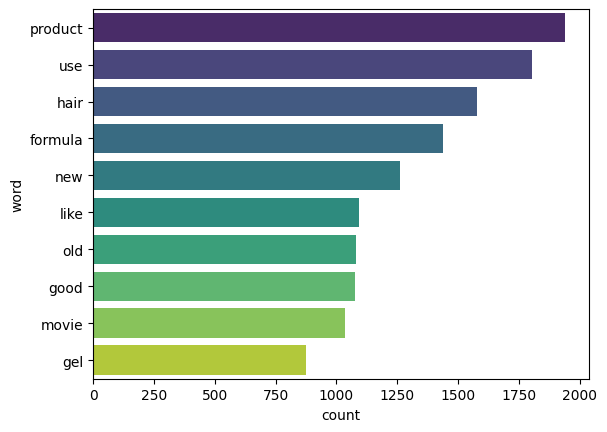

In [63]:
common_word_sentiment(0,10)

In [64]:
print(f"Percentof 0 is : {(len(df_clean[df_clean['user_sentiment']==0])/df_clean.shape[0])*100}")
print(f"Percentof 1 is : {(len(df_clean[df_clean['user_sentiment']==1])/df_clean.shape[0])*100}")

Percentof 0 is : 10.497016567218907
Percentof 1 is : 89.5029834327811


In [65]:
X = df_clean['reviews_full_text']
y = df_clean['user_sentiment']

In [65]:
#using TF-IDF vectorizer using the parameters to get 650 features.
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=650, max_df=0.9, min_df=7, binary=True, 
                                   ngram_range=(1,2))
X_train_tfidf = tfidf_vectorizer.fit_transform(df_clean['reviews_full_text'])

y= df_clean['user_sentiment']

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer (BoW)
bow_vectorizer = CountVectorizer(
    max_features=650,      # Top 650 frequent tokens
    max_df=0.9,            # Ignore terms in >90% of docs
    min_df=7,              # Ignore terms in <7 docs
    binary=False,           # Just 0/1 if word present or not
    ngram_range=(1, 2)     # Use unigrams and bigrams
)

# Fit and transform your cleaned text reviews
X_train_bow = bow_vectorizer.fit_transform(df_clean['reviews_full_text'])

# Labels
y = df_clean['user_sentiment']



In [69]:
from gensim.models import Word2Vec
import numpy as np

# Tokenize reviews
tokenized_reviews = [review.split() for review in df_clean['reviews_full_text']]

# Train Word2Vec
w2v_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Average word vectors per review
def get_w2v_vector(words):
    return np.mean([w2v_model.wv[word] for word in words if word in w2v_model.wv], axis=0)

X_word2vec = np.array([get_w2v_vector(review) for review in tokenized_reviews])
y = df_clean['user_sentiment']


In [70]:
# Load pretrained GloVe vectors (e.g., glove.6B.100d.txt)
glove_vectors = {}
with open("glove.6B.100d.txt", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        glove_vectors[word] = np.asarray(values[1:], dtype='float32')

# Average GloVe vectors per review
def get_glove_vector(words):
    return np.mean([glove_vectors[word] for word in words if word in glove_vectors], axis=0)

X_glove = np.array([get_glove_vector(review.split()) for review in df_clean['reviews_full_text']])


FileNotFoundError: [Errno 2] No such file or directory: 'glove.6B.100d.txt'

In [72]:
pip install fasttext

     ---------------------------------------- 0.0/73.4 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/73.4 kB ? eta -:--:--
     --------------- ---------------------- 30.7/73.4 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 73.4/73.4 kB 579.8 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
Failed to build fasttext
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [45 lines of output]
  C:\Users\sayan\AppData\Local\Temp\pip-build-env-_1wvsth4\overlay\Lib\site-packages\setuptools\dist.py:599: SetuptoolsDeprecationWarning: Invalid dash-separated key 'description-file' in 'metadata' (setup.cfg), please use the underscore name 'description_file' instead.
  !!
  
          ********************************************************************************
          Usage of dash-separated 'description-file' will not be supported in future
          versions. Please use the underscore name 'description_file' instead.
          (Affected: fasttext).
  
          By 2026-Mar-03, you need to update your project and remove deprecated calls
          or your builds will no longer be supported.
  
          See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
          ********************************************************************************
  
  !!
    opt =

In [73]:
import fasttext
import fasttext.util
import numpy as np

# Download and load English FastText pretrained model
fasttext.util.download_model('en', if_exists='ignore')
ft = fasttext.load_model('cc.en.300.bin')

# Average FastText vectors per review
def get_fasttext_vector(text):
    return np.mean([ft.get_word_vector(word) for word in text.split()], axis=0)

X_fasttext = np.array([get_fasttext_vector(review) for review in df_clean['reviews_full_text']])


ModuleNotFoundError: No module named 'fasttext'

In [75]:
tfidf_vectorizer.get_feature_names_out()

array(['able', 'absolutely', 'absolutely love', 'act', 'action',
       'action movie', 'actor', 'actually', 'add', 'age', 'ago', 'amaze',
       'amazing', 'apply', 'area', 'ask', 'away', 'awesome',
       'awesome movie', 'awesome product', 'awful', 'baby', 'bad', 'bag',
       'balm', 'base', 'bathroom', 'bathroom kitchen', 'beautiful', 'bee',
       'begin', 'believe', 'best', 'best buy', 'best product', 'big',
       'bit', 'black', 'bleach', 'blu', 'blu ray', 'bluray', 'body',
       'bottle', 'box', 'boy', 'brand', 'break', 'bring', 'bring cocoa',
       'bring old', 'brown', 'burt', 'burt bee', 'buy', 'canister', 'car',
       'care', 'carpet', 'carry', 'cast', 'cd', 'chair', 'change',
       'character', 'cheap', 'child', 'chili', 'chip', 'classic',
       'classroom', 'clay', 'clean', 'clean bathroom', 'clean disinfect',
       'clean easy', 'clean fresh', 'clean great', 'clean kitchen',
       'clean love', 'clean mess', 'clean review', 'clean smell',
       'clean ups', 'cl

In [66]:
# splitting into test and train
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, y, random_state=42, test_size=0.25)

In [90]:
counter = Counter(y_train)
print('Before',counter)

sm = SMOTE()

# transform the dataset
X_train, y_train = sm.fit_resample(X_train, y_train)

counter = Counter(y_train)
print('After',counter)

Before Counter({0.0: 20111, 1.0: 20111})
After Counter({0.0: 20111, 1.0: 20111})


In [68]:
class ModelBuilder:
    def __init__(self, model, x_train, x_test, y_train, y_test):
        self.model = model
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
        
        
    def train_model(self):
        self.model.fit(self.x_train,self.y_train)
        return self.model.predict(self.x_test)
    
    def evaluate_model(self, y_pred_class):
        print("\n")
        print("*"*30)
        self.result_metrics = self.evaluate_metrics(y_pred_class)
        print("*"*30)
        print("\n")
        
        self.classification_report(y_pred_class)
        print("*"*30)
        print("\n")
        self.confusion_matrix(y_pred_class)
            
        print("*"*30)
        print("\n")
        
        RocCurveDisplay.from_estimator(self.model, self.x_test, self.y_test)
        
        return self.result_metrics
        
    def evaluate_metrics(self, y_pred_class):
        result_metrics = [] 
        accuracy = accuracy_score(self.y_test, y_pred_class)
        precision = precision_score(self.y_test, y_pred_class)
        recall = recall_score(self.y_test, y_pred_class)
        f1score = f1_score(self.y_test, y_pred_class)
        y_pred_prob = self.model.predict_proba(self.x_test)[:,1]
        roc_auc = roc_auc_score(self.y_test, y_pred_prob)
        
        print(f"Accuracy is : {accuracy*100:.1f}%")
        print(f"Precision is : {precision*100:.1f}%")
        print(f"Recall is : {recall*100:.1f}%")
        print(f"F1 Score is : {f1score*100:.1f}%")
        print(f"Roc-Auc Score is:{roc_auc*100:.1f}%")
        
        result_metrics.append(accuracy)
        result_metrics.append(precision)
        result_metrics.append(recall)
        result_metrics.append(f1score)
        result_metrics.append(roc_auc)
        return result_metrics
        
    def confusion_matrix(self, y_pred_class):
        cm = confusion_matrix(self.y_test, y_pred_class)
        self.plot_confusion_matrix(cm,[0,1])
        
        
    def plot_confusion_matrix(self, data, labels):
        sns.set(color_codes=True)
        plt.title("Confusion Matrix")
        ax = sns.heatmap(data/np.sum(data), annot=True, cmap="Blues", fmt=".2%")
 
        ax.set_xticklabels(labels)
        ax.set_yticklabels(labels)
 
        ax.set(ylabel="True Values", xlabel="Predicted Values")
        plt.show()
        
    def classification_report(self, y_pred_class):
        print(classification_report(self.y_test, y_pred_class))
               

In [77]:
# build logistic model
logreg_ci = LogisticRegression(random_state=42, max_iter=100,solver='liblinear', class_weight="balanced")
lr_ci_modebuilder = ModelBuilder(logreg_ci, X_train, X_test, y_train, y_test)



******************************
Accuracy is : 87.9%
Precision is : 96.7%
Recall is : 89.6%
F1 Score is : 93.0%
Roc-Auc Score is:90.4%
******************************


              precision    recall  f1-score   support

         0.0       0.44      0.73      0.55       761
         1.0       0.97      0.90      0.93      6739

    accuracy                           0.88      7500
   macro avg       0.70      0.81      0.74      7500
weighted avg       0.91      0.88      0.89      7500

******************************




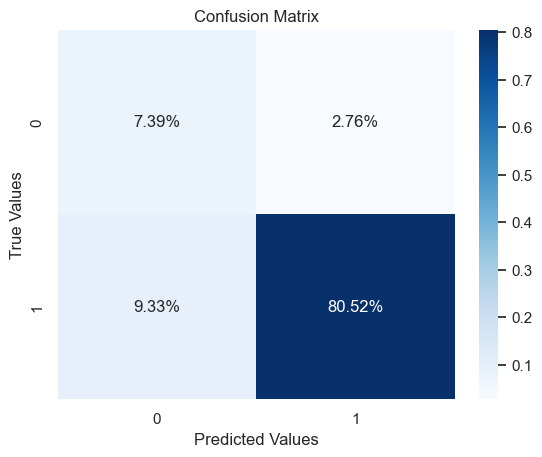

******************************




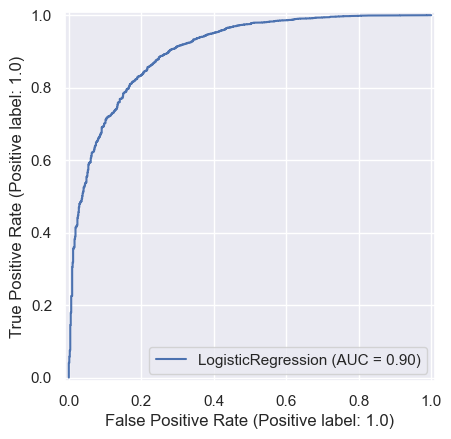

In [78]:
# Train and Predict the Test Labels
y_pred_class  = lr_ci_modebuilder.train_model()
lr_metrics = lr_ci_modebuilder.evaluate_model(y_pred_class)

In [79]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB 



******************************
Accuracy is : 80.4%
Precision is : 97.6%
Recall is : 80.1%
F1 Score is : 88.0%
Roc-Auc Score is:89.5%
******************************


              precision    recall  f1-score   support

         0.0       0.32      0.83      0.46       761
         1.0       0.98      0.80      0.88      6739

    accuracy                           0.80      7500
   macro avg       0.65      0.82      0.67      7500
weighted avg       0.91      0.80      0.84      7500

******************************




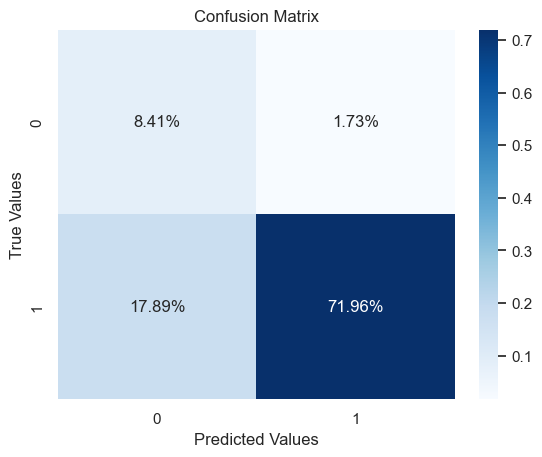

******************************




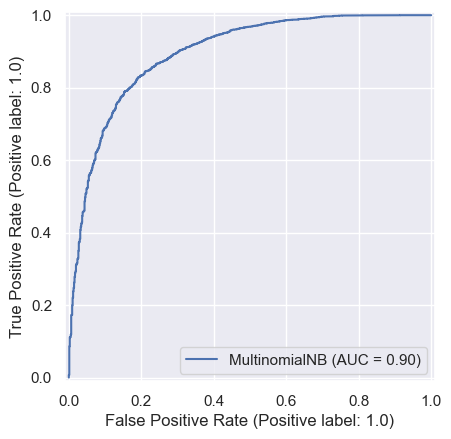

In [80]:
mnb = MultinomialNB(alpha=1.0)
mnb_modebuilder = ModelBuilder(mnb, X_train, X_test, y_train, y_test)
# Train and Predict the Test Labels
y_pred_class  = mnb_modebuilder.train_model()
nb_metrics = mnb_modebuilder.evaluate_model(y_pred_class)

In [81]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [70]:
dt = DecisionTreeClassifier(random_state=42, criterion="gini", max_depth=10)



******************************
Accuracy is : 81.7%
Precision is : 95.8%
Recall is : 83.3%
F1 Score is : 89.1%
Roc-Auc Score is:81.2%
******************************


              precision    recall  f1-score   support

         0.0       0.31      0.67      0.43       761
         1.0       0.96      0.83      0.89      6739

    accuracy                           0.82      7500
   macro avg       0.64      0.75      0.66      7500
weighted avg       0.89      0.82      0.84      7500

******************************




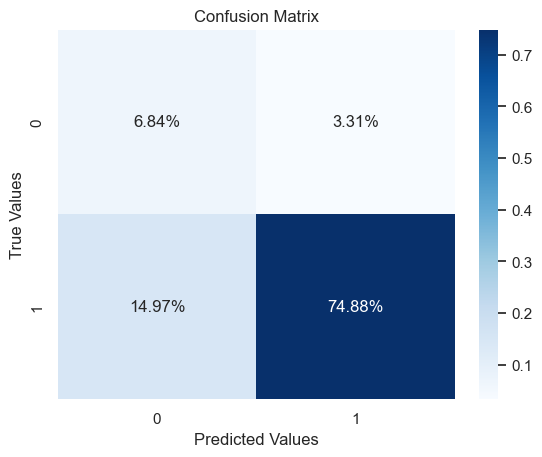

******************************




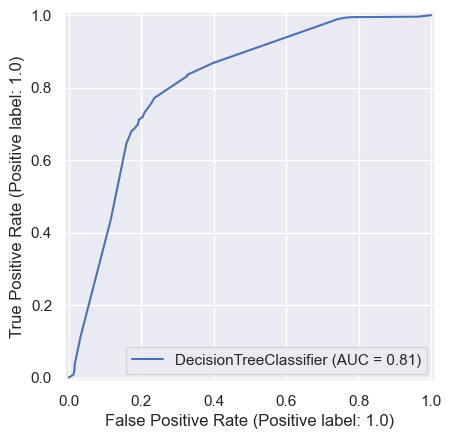

In [71]:
dt_modelbuilder = ModelBuilder(dt, X_train, X_test, y_train, y_test)
y_pred_class  = dt_modelbuilder.train_model()
dt_metrics_cv = dt_modelbuilder.evaluate_model(y_pred_class)

In [72]:
rf = RandomForestClassifier( random_state=42, criterion="gini")



******************************
Accuracy is : 92.7%
Precision is : 95.5%
Recall is : 96.4%
F1 Score is : 96.0%
Roc-Auc Score is:91.1%
******************************


              precision    recall  f1-score   support

         0.0       0.65      0.60      0.62       761
         1.0       0.96      0.96      0.96      6739

    accuracy                           0.93      7500
   macro avg       0.80      0.78      0.79      7500
weighted avg       0.92      0.93      0.93      7500

******************************




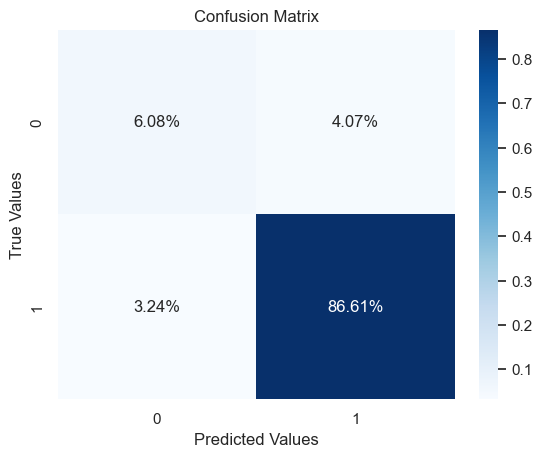

******************************




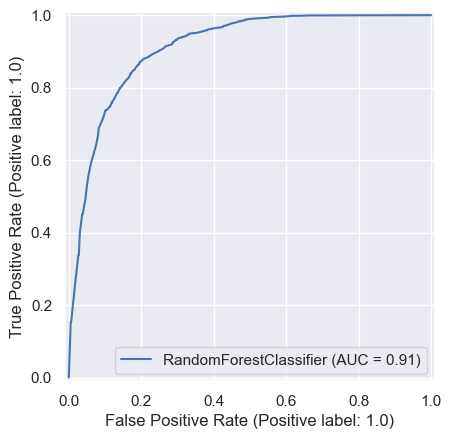

In [73]:
rf_modebuilder = ModelBuilder(rf, X_train, X_test, y_train, y_test)
y_pred_class  = rf_modebuilder.train_model()
rf_metrics = rf_modebuilder.evaluate_model(y_pred_class)

In [88]:
params = {
    'max_depth': [2,3,5,7,8,10,15,18],
    'min_samples_leaf': [5,10,15,20,50],
    'n_estimators': [10,15,20,23,25,50,100]
}

In [89]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1)
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 280 candidates, totalling 1120 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 7, 8, 10, 15, 18],
                         'min_samples_leaf': [5, 10, 15, 20, 50],
                         'n_estimators': [10, 15, 20, 23, 25, 50, 100]},
             verbose=1)



******************************
Accuracy is : 83.1%
Precision is : 96.9%
Recall is : 83.8%
F1 Score is : 89.9%
Roc-Auc Score is:89.4%
******************************


              precision    recall  f1-score   support

         0.0       0.35      0.76      0.48       761
         1.0       0.97      0.84      0.90      6739

    accuracy                           0.83      7500
   macro avg       0.66      0.80      0.69      7500
weighted avg       0.91      0.83      0.86      7500

******************************




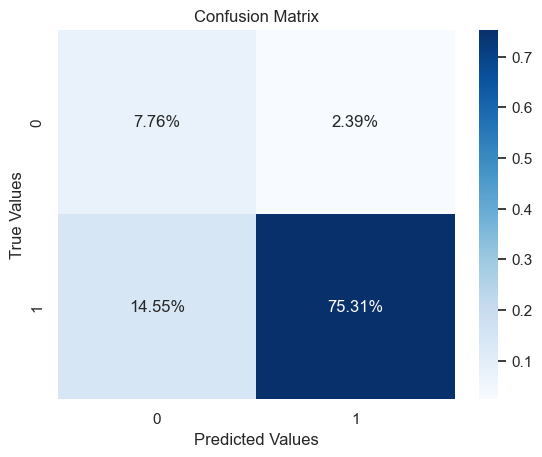

******************************




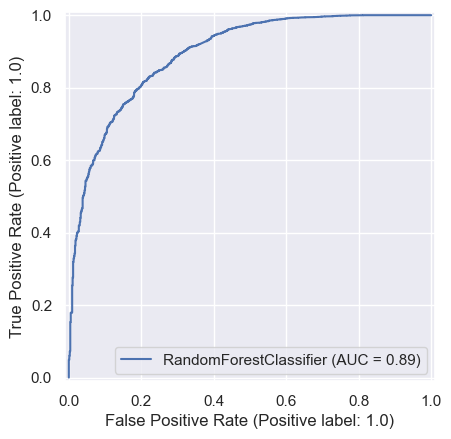

In [90]:
rf_best = grid_search.best_estimator_
rf_modebuilder2 = ModelBuilder(rf_best, X_train, X_test, y_train, y_test)
y_pred_class  = rf_modebuilder2.train_model()
rf_metrics2 = rf_modebuilder2.evaluate_model(y_pred_class)

[LightGBM] [Info] Number of positive: 20111, number of negative: 20111
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.055036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 101700
[LightGBM] [Info] Number of data points in the train set: 40222, number of used features: 650
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


******************************
Accuracy is : 89.8%
Precision is : 96.2%
Recall is : 92.3%
F1 Score is : 94.2%
Roc-Auc Score is:90.6%
******************************


              precision    recall  f1-score   support

         0.0       0.50      0.68      0.57       761
         1.0       0.96      0.92      0.94      6739

    accuracy                           0.90      7500
   macro avg       0.73      0.80      0.76      7500
weighted avg       0.92      0.90      0.90      7500

******************************




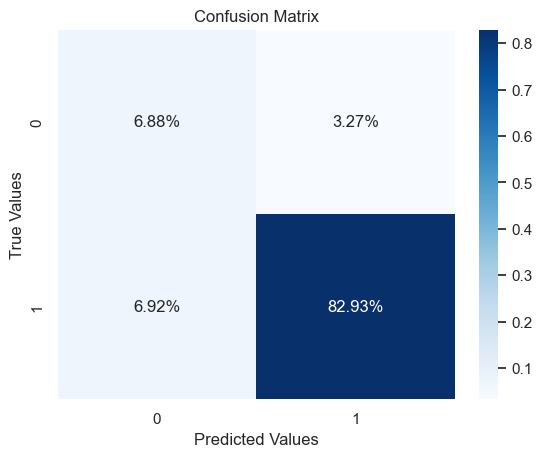

******************************




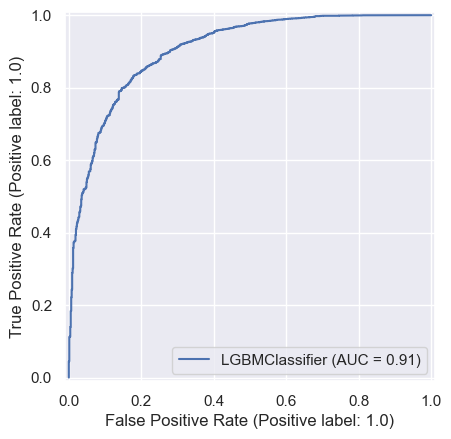

In [74]:
lgbm = LGBMClassifier()
lgbm_modebuilder = ModelBuilder(lgbm, X_train, X_test, y_train, y_test)
y_pred_class  = lgbm_modebuilder.train_model()
lgbm_metrics = lgbm_modebuilder.evaluate_model(y_pred_class)



******************************
Accuracy is : 90.2%
Precision is : 96.2%
Recall is : 92.8%
F1 Score is : 94.5%
Roc-Auc Score is:90.9%
******************************


              precision    recall  f1-score   support

         0.0       0.51      0.67      0.58       761
         1.0       0.96      0.93      0.94      6739

    accuracy                           0.90      7500
   macro avg       0.74      0.80      0.76      7500
weighted avg       0.92      0.90      0.91      7500

******************************




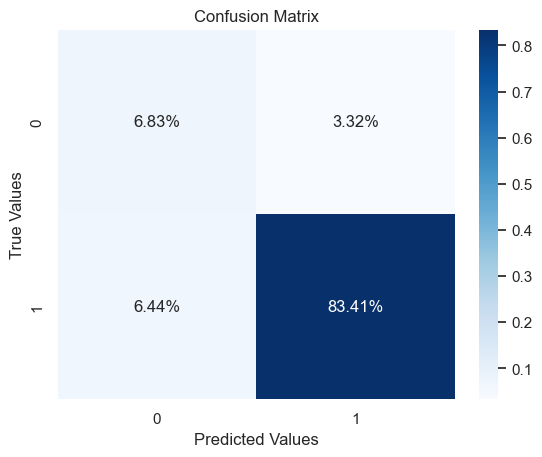

******************************




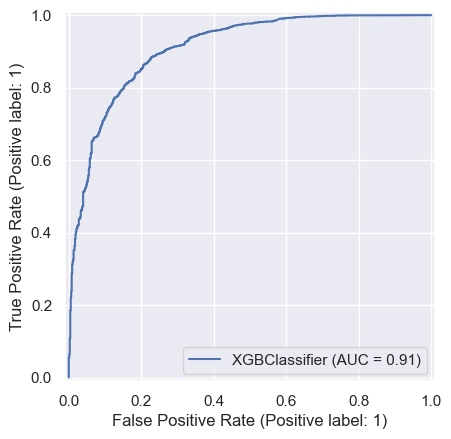

In [75]:
xg = XGBClassifier()
xgb_modebuilder = ModelBuilder(xg, X_train, X_test, y_train, y_test)
y_pred_class  = xgb_modebuilder.train_model()
xgb_metrics = xgb_modebuilder.evaluate_model(y_pred_class)

In [82]:
metrics_table = {'Metric': ['Accuracy','Precision','Recall',
                       'F1Score','Auc Score'], 
        'Logistic Regression': lr_metrics,
        'Naive Bayes': nb_metrics,
        'Decision Tree': dt_metrics_cv,
        'Random Forest': rf_metrics,
        'XG Boost': xgb_metrics,
        'LightGBM': lgbm_metrics
        }

df_metrics = pd.DataFrame(metrics_table ,columns = ['Metric', 'Logistic Regression', 'Naive Bayes','Decision Tree','Random Forest',
                                                    'XG Boost','LightGBM'] )

df_metrics


Metric  Logistic Regression  Naive Bayes  Decision Tree  Random Forest  \
0   Accuracy             0.879067     0.803733       0.817200       0.926933   
1  Precision             0.966859     0.976479       0.957708       0.955154   
2     Recall             0.896127     0.800861       0.833358       0.963941   
3    F1Score             0.930150     0.879993       0.891216       0.959527   
4  Auc Score             0.903950     0.895037       0.812067       0.910944   

   XG Boost  LightGBM  
0  0.902400  0.898133  
1  0.961722  0.962104  
2  0.928328  0.922986  
3  0.944730  0.942139  
4  0.908939  0.905695

In [83]:
# LETS TRY OPTUNA to get the best model with hyperparameters (above we used gridsearch and default params)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [95]:
def objective(trial):
        model_name = trial.suggest_categorical("model",["SVC","RF","KNN","GB","XGB","LGBM"])

        if model_name == "SVC":
            kernel_svm = trial.suggest_categorical("kernel_svc",["linear","poly","rbf"])
            if kernel_svm == "linear":
                c_linear = trial.suggest_float("c_linear",0,5)
                model = SVC(C=c_linear,kernel="linear")

            elif kernel_svm == "poly":
                c_poly = trial.suggest_float("c_poly",0,10)
                degree_poly = trial.suggest_int("degree_poly",1,3)
                model = SVC(C=c_poly,degree=degree_poly,
                            kernel="poly")

            else:
                c_rbf = trial.suggest_float("c_rbf",0,100)
                gamma_rbf = trial.suggest_float("gamma_rbf",0,3)
                model = SVC(C=c_rbf,gamma=gamma_rbf,
                            kernel="rbf")
                

        elif model_name == "RF":
            n_estimators_rf = trial.suggest_int("n_estimators_rf",10,100)
            max_depth_rf = trial.suggest_int("max_depth_rf",2,10)
            model = RandomForestClassifier(n_estimators=n_estimators_rf,
                                        max_depth=max_depth_rf,
                                        random_state=42,
                                        n_jobs=-1)

        elif model_name == "GB":
            n_estimators_gb = trial.suggest_int("n_estimators_gb",10,100)
            learning_rate_gb = trial.suggest_float("learning_rate_gb",0,1)
            max_depth_gb = trial.suggest_int("max_depth_gb",2,20)
            model = GradientBoostingClassifier(n_estimators=n_estimators_gb,
                                                learning_rate=learning_rate_gb,
                                                max_depth=max_depth_gb,
                                                random_state=42)

        elif model_name == "KNN":
            n_neighbors_knn = trial.suggest_int("n_neighbors_knn",1,20)
            weights_knn = trial.suggest_categorical("weights_knn",["uniform","distance"])
            model = KNeighborsClassifier(n_neighbors=n_neighbors_knn,
                                        weights=weights_knn,n_jobs=-1)

        elif model_name == "XGB":
            n_estimators_xgb = trial.suggest_int("n_estimators_xgb",10,150)
            learning_rate_xgb = trial.suggest_float("learning_rate_xgb",0.1,0.5)
            max_depth_xgb = trial.suggest_int("max_depth_xgb",2,15)
            model = XGBClassifier(n_estimators=n_estimators_xgb,
                                    learning_rate=learning_rate_xgb,
                                    max_depth=max_depth_xgb,
                                    random_state=42,
                                    n_jobs=-1)

        elif model_name == "LGBM":
            n_estimators_lgbm = trial.suggest_int("n_estimators_lgbm",10,200)
            learning_rate_lgbm = trial.suggest_float("learning_rate_lgbm",0.1,0.5)
            max_depth_lgbm = trial.suggest_int("max_depth_lgbm",2,20)
            model = LGBMClassifier(n_estimators=n_estimators_lgbm,
                                    learning_rate=learning_rate_lgbm,
                                    max_depth=max_depth_lgbm,
                                    random_state=42,n_jobs=-1)


        # train the model
        model.fit(X_train,y_train)


        # get the predictions
        y_pred_train = model.predict(X_train)
        y_pred_test= model.predict(X_test)

        # calculate the error
        score = accuracy_score(y_test,y_pred_test)

        return score

In [96]:
study = optuna.create_study(direction="maximize",study_name="model_selection")

# optimize the objective function
study.optimize(objective,n_trials=30,n_jobs=-1)

[I 2025-06-20 14:11:48,409] A new study created in memory with name: model_selection
[I 2025-06-20 14:11:54,192] Trial 4 finished with value: 0.7334666666666667 and parameters: {'model': 'RF', 'n_estimators_rf': 87, 'max_depth_rf': 3}. Best is trial 4 with value: 0.7334666666666667.
[I 2025-06-20 14:11:54,474] Trial 3 finished with value: 0.7442666666666666 and parameters: {'model': 'RF', 'n_estimators_rf': 90, 'max_depth_rf': 5}. Best is trial 3 with value: 0.7442666666666666.
[I 2025-06-20 14:12:09,368] Trial 8 finished with value: 0.8448 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 65, 'learning_rate_lgbm': 0.2880514963399939, 'max_depth_lgbm': 3}. Best is trial 8 with value: 0.8448.
[I 2025-06-20 14:12:31,938] Trial 10 finished with value: 0.8981333333333333 and parameters: {'model': 'XGB', 'n_estimators_xgb': 97, 'learning_rate_xgb': 0.3236210541196509, 'max_depth_xgb': 6}. Best is trial 10 with value: 0.8981333333333333.
[I 2025-06-20 14:12:43,182] Trial 1 finished with

In [97]:
study.best_params

{'model': 'SVC',
 'kernel_svc': 'poly',
 'c_poly': 4.450579651600554,
 'degree_poly': 3}

In [98]:
study.best_value

0.9309333333333333

In [91]:
sc = StackingClassifier(estimators=[('xgb',xg),('rf',rf)],final_estimator=lgbm,cv=5)

[LightGBM] [Info] Number of positive: 20111, number of negative: 20111
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000473 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 40222, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


******************************
Accuracy is : 93.1%
Precision is : 94.8%
Recall is : 97.7%
F1 Score is : 96.2%
Roc-Auc Score is:91.1%
******************************


              precision    recall  f1-score   support

         0.0       0.72      0.53      0.61       761
         1.0       0.95      0.98      0.96      6739

    accuracy                           0.93      7500
   macro avg       0.83      0.75      0.78      7500
weighted avg       0.92      0.93      0.93      7500

******************************




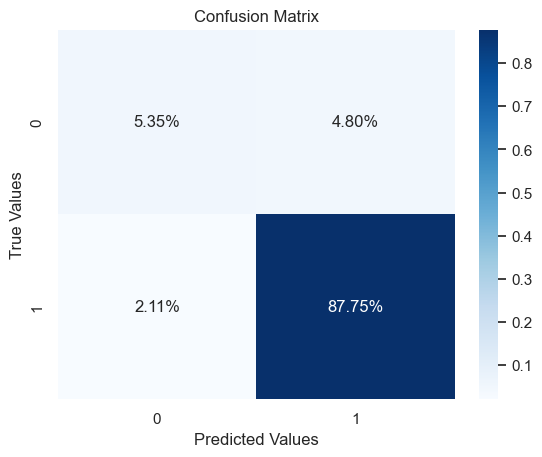

******************************




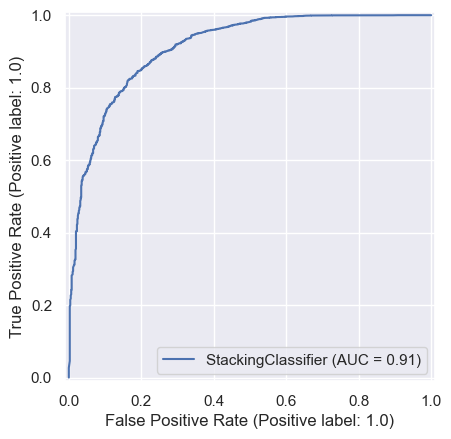

In [92]:
sc_modebuilder = ModelBuilder(sc, X_train, X_test, y_train, y_test)
y_pred_class  = sc_modebuilder.train_model()
sc_metrics = sc_modebuilder.evaluate_model(y_pred_class)

In [86]:

import pickle

with open('tfidf-vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

with open('stacking_model.pkl', 'wb') as f:
    pickle.dump(sc, f)


In [87]:
df_clean.to_pickle('cleaned_data.pkl')

# Recommendation System

In [103]:
df_recommendation = df[["id", "name", "reviews_rating", "reviews_username"]]

In [104]:
#splitting the train and test
train, test = train_test_split(df_recommendation, test_size=0.25, random_state=42)

In [105]:
product_column = "id"
user_column = "reviews_username"
value_column = "reviews_rating"

In [106]:
# Pivot the train ratings' dataset into matrix format in which columns are product names and the rows are user names.
df_pivot = pd.pivot_table(train,index=user_column, columns = product_column, values = value_column).fillna(0)
df_pivot.head(10)

id                AV13O1A8GV-KLJ3akUyj  AV14LG0R-jtxr-f38QfS  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
01impala                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   
06stidriver                        0.0                   0.0   
08dallas                           0.0                   0.0   
09mommy11                          0.0                   0.0   
1.11E+24                           0.0                   0.0   
1085                               0.0                   0.0   

id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
01impala                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   
06stidriver                        0.0                   0.0   
08dallas                           0.0                   0.0   
09mommy11                          0.0                   0.0   
1.11E+24                           0.0                   0.0   
1085                               0.0                   0.0   

id                AV1YIch7GV-KLJ3addeG  AV1YlENIglJLPUi8IHsX  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
01impala                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   
06stidriver                        0.0                   0.0   
08dallas                           0.0                   0.0   
09mommy11                          0.0                   0.0   
1.11E+24                           0.0                   0.0   
1085                               0.0                   0.0   

id                AV1YmBrdGV-KLJ3adewb  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
01impala                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   
06stidriver                        0.0                   0.0   
08dallas                           0.0                   0.0   
09mommy11                          0.0                   0.0   
1.11E+24                           0.0                   0.0   
1085                               0.0                   0.0   

id                AV1Ymf_rglJLPUi8II2v  AV1Yn94nvKc47QAVgtst  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
01impala                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   
06stidriver                        0.0                   0.0   
08dallas                           0.0                   0.0   
09mommy11                          0.0                   0.0   
1.11E+24                           0.0                   0.0   
1085                               0.0                   0.0   

id                AV1YnUMYglJLPUi8IJpK  AV1Ynb3bglJLPUi8IJxJ  \
reviews_username                                               
00dog3                     

In [107]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [108]:
dummy_train.head()

id  \
21177  AVpfm8yiLJeJML43AYyu   
23942  AVpfPaoqLJeJML435Xk9   
1247   AV1YneDPglJLPUi8IJyQ   
23622  AVpfPaoqLJeJML435Xk9   
28455  AVpftikC1cnluZ0-p31V   

                                                                         name  \
21177                               Nexxus Exxtra Gel Style Creation Sculptor   
23942         Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd   
1247       Finish Quantum Dishwasher Detergent, Lemon Sparkle Scent, 45 Count   
23622         Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd   
28455  Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish   

       reviews_rating reviews_username  
21177               1          bobdigi  
23942               4          skeeter  
1247                5          mruduka  
23622               4       kiddro3523  
28455               1          murdook

In [109]:
# The products not rated by user is marked as 1 for prediction. 
dummy_train[value_column] = dummy_train[value_column].apply(lambda x: 0 if x>=1 else 1)

In [110]:
# Pivot the train ratings' dataset into matrix format in which columns are product names and the rows are user names.
dummy_train = pd.pivot_table(dummy_train,index=user_column, columns = product_column, values = value_column).fillna(1)
dummy_train.head(10)

id                AV13O1A8GV-KLJ3akUyj  AV14LG0R-jtxr-f38QfS  \
reviews_username                                               
00dog3                             1.0                   1.0   
00sab00                            1.0                   1.0   
01impala                           1.0                   1.0   
02deuce                            1.0                   1.0   
0325home                           1.0                   1.0   
06stidriver                        1.0                   1.0   
08dallas                           1.0                   1.0   
09mommy11                          1.0                   1.0   
1.11E+24                           1.0                   1.0   
1085                               1.0                   1.0   

id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                               
00dog3                             1.0                   1.0   
00sab00                            1.0                   1.0   
01impala                           1.0                   1.0   
02deuce                            1.0                   1.0   
0325home                           1.0                   1.0   
06stidriver                        1.0                   1.0   
08dallas                           1.0                   1.0   
09mommy11                          1.0                   1.0   
1.11E+24                           1.0                   1.0   
1085                               1.0                   1.0   

id                AV1YIch7GV-KLJ3addeG  AV1YlENIglJLPUi8IHsX  \
reviews_username                                               
00dog3                             1.0                   1.0   
00sab00                            1.0                   1.0   
01impala                           1.0                   1.0   
02deuce                            1.0                   1.0   
0325home                           1.0                   1.0   
06stidriver                        1.0                   1.0   
08dallas                           1.0                   1.0   
09mommy11                          1.0                   1.0   
1.11E+24                           1.0                   1.0   
1085                               1.0                   1.0   

id                AV1YmBrdGV-KLJ3adewb  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                               
00dog3                             1.0                   1.0   
00sab00                            1.0                   1.0   
01impala                           1.0                   1.0   
02deuce                            1.0                   1.0   
0325home                           1.0                   1.0   
06stidriver                        1.0                   1.0   
08dallas                           1.0                   1.0   
09mommy11                          1.0                   1.0   
1.11E+24                           1.0                   1.0   
1085                               1.0                   1.0   

id                AV1Ymf_rglJLPUi8II2v  AV1Yn94nvKc47QAVgtst  \
reviews_username                                               
00dog3                             1.0                   1.0   
00sab00                            1.0                   1.0   
01impala                           1.0                   1.0   
02deuce                            1.0                   1.0   
0325home                           1.0                   1.0   
06stidriver                        1.0                   1.0   
08dallas                           1.0                   1.0   
09mommy11                          1.0                   1.0   
1.11E+24                           1.0                   1.0   
1085                               1.0                   1.0   

id                AV1YnUMYglJLPUi8IJpK  AV1Ynb3bglJLPUi8IJxJ  \
reviews_username                                               
00dog3                     

# User similarity matrix

In [111]:
df_pivot.index.nunique()

19376

In [112]:
from sklearn.metrics.pairwise import pairwise_distances, cosine_similarity

In [113]:
#using cosine_similarity function to compute the distance.
user_correlation = cosine_similarity(df_pivot)
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)
print(user_correlation.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]]
(19376, 19376)


# Prediction User-User

In [114]:
#filtering out the user_correlation that are negatively correlated
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.]])

In [115]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 2.39045722, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [116]:
#since we are interested in products that are not rated by the user, we multiply with dummy train to make it zero
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

id                AV13O1A8GV-KLJ3akUyj  AV14LG0R-jtxr-f38QfS  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
01impala                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       0.000000             11.941112   
01impala                      2.390457             15.676303   
02deuce                       2.390457             15.676303   
0325home                      0.000000             10.007009   

id                AV1YIch7GV-KLJ3addeG  AV1YlENIglJLPUi8IHsX  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
01impala                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV1YmBrdGV-KLJ3adewb  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                               
00dog3                             0.0              0.000000   
00sab00                            0.0              2.222321   
01impala                           0.0              0.000000   
02deuce                            0.0              0.000000   
0325home                           0.0              2.886751   

id                AV1Ymf_rglJLPUi8II2v  AV1Yn94nvKc47QAVgtst  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       0.000000              0.000000   
01impala                      2.612571              0.000000   
02deuce                       2.612571              0.000000   
0325home                      6.937603              4.440376   

id                AV1YnUMYglJLPUi8IJpK  AV1Ynb3bglJLPUi8IJxJ  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
01impala                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV1YneDPglJLPUi8IJyQ  AV1YpiJvvKc47QAVguxy  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
01impala                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV1YqAaMGV-KLJ3adiDj  AV1Ys0kTvKc47QAVgx1C  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       0.000000              3.246093   
01impala                      1.849001              3.807218   
02deuce                       1.849001              3.807218   
0325home                      0.000000              0.000000   

id                AV1YtGjdglJLPUi8IOfJ  AV1ZSp2uglJLPUi8IQFy  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       0.907115              0.000000   
01impala                      0.000000              5.409041   
02deuce                       0.000000              5.409041   
0325home                

In [117]:
user_input = "08dallas" 
print(user_input)

08dallas


In [118]:
recommendations = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
recommendations

id
AVpfRTh1ilAPnD_xYic2    23.259047
AVpfPaoqLJeJML435Xk9    22.263409
AVpf0eb2LJeJML43EVSt    12.063199
AVpf3VOfilAPnD_xjpun     7.562528
AVpf2tw1ilAPnD_xjflC     7.202148
AVpe41TqilAPnD_xQH3d     5.870407
AVpfJP1C1cnluZ0-e3Xy     2.886751
AVpfR5m0LJeJML436K3W     2.886751
AVpfoSS51cnluZ0-oVH9     2.886751
AVpf7I3i1cnluZ0-tnL6     2.867697
AVpfM_ytilAPnD_xXIJb     2.461830
AVpfH2Rx1cnluZ0-eYtu     2.019481
AVpfhxaELJeJML43-zsM     2.019481
AVpe8xjUilAPnD_xRkxC     2.019481
AVpfm8yiLJeJML43AYyu     1.956197
AVpfOmKwLJeJML435GM7     1.554120
AVpfPnrU1cnluZ0-g9rL     1.552301
AV1Yn94nvKc47QAVgtst     1.552301
AVpf385g1cnluZ0-s0_t     1.241841
AV1YGDqsGV-KLJ3adc-O     0.605844
Name: 08dallas, dtype: float64

In [121]:
#display the top 20 product id, name and similarity_score 
final_recommendations = pd.DataFrame({'product_id': recommendations.index, 'similarity_score' : recommendations})
final_recommendations.reset_index(drop=True)
pd.merge(final_recommendations, train, on="id")[["id", "name", "similarity_score"]].drop_duplicates()

id  \
0      AVpfRTh1ilAPnD_xYic2   
873    AVpfPaoqLJeJML435Xk9   
3350   AVpf0eb2LJeJML43EVSt   
3989   AVpf3VOfilAPnD_xjpun   
10347  AVpf2tw1ilAPnD_xjflC   
10864  AVpe41TqilAPnD_xQH3d   
11437  AVpfJP1C1cnluZ0-e3Xy   
12985  AVpfR5m0LJeJML436K3W   
13136  AVpfoSS51cnluZ0-oVH9   
13185  AVpf7I3i1cnluZ0-tnL6   
13208  AVpfM_ytilAPnD_xXIJb   
13403  AVpfH2Rx1cnluZ0-eYtu   
13406  AVpfhxaELJeJML43-zsM   
13408  AVpe8xjUilAPnD_xRkxC   
13420  AVpfm8yiLJeJML43AYyu   
13942  AVpfOmKwLJeJML435GM7   
14221  AVpfPnrU1cnluZ0-g9rL   
14364  AV1Yn94nvKc47QAVgtst   
14386  AVpf385g1cnluZ0-s0_t   
14533  AV1YGDqsGV-KLJ3adc-O   

                                                                                 name  \
0                 Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)   
873                   Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd   
3350                                   The Resident Evil Collection 5 Discs (blu-Ray)   
3989                        Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total   
10347                                                Red (special Edition) (dvdvideo)   
10864                                    Mike Dave Need Wedding Dates (dvd + Digital)   
11437                                            Clorox Disinfecting Bathroom Cleaner   
12985                                                  Jason Aldean - They Don't Know   
13136                              Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks   
13185                      Mrs. Meyer's174 Lemon Verbena Laundry Scent Booster - 18oz   
13208                                               Tostitos Bite Size Tortilla Chips   
13403  Lynk Professional174 Pull Out Cutting Board Bakeware Sliding Cabinet Organizer   
13406                              Batherapy Natural Mineral Bath Sport Liquid, 16 oz   
13408                                            The Honest Company Laundry Detergent   
13420                                       Nexxus Exxtra Gel Style Creation Sculptor   
13942                        Clear Scalp & Hair Therapy Total Care Nourishing Shampoo   
14221                    Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)   
14364                                                        CeraVe SA Renewing Cream   
14386                                                          Hormel Chili, No Beans   
14533                           Windex Original Glass Cleaner Refill 67.6oz (2 Liter)   

       similarity_score  
0             23.259047  
873           22.263409  
3350          12.063199  
3989           7.562528  
10347          7.202148  
10864          5.870407  
11437          2.886751  
12985          2.886751  
13136          2.886751  
13185          2.867697  
13208          2.461830  
13403          2.019481  
13406          2.019481  
13408          2.019481  
13420          1.956197  
13942          1.554120  
14221          1.552301  
14364          1.552301  
14386          1.241841  
14533          0.605844

# Evaluation User-User


In [122]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(1768, 4)

In [123]:
common.head()

id  \
2308   AVpe41TqilAPnD_xQH3d   
22404  AVpfOmKwLJeJML435GM7   
11311  AVpf3VOfilAPnD_xjpun   
19043  AVpfJP1C1cnluZ0-e3Xy   
9482   AVpf3VOfilAPnD_xjpun   

                                                            name  \
2308                Mike Dave Need Wedding Dates (dvd + Digital)   
22404   Clear Scalp & Hair Therapy Total Care Nourishing Shampoo   
11311  Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total   
19043                       Clorox Disinfecting Bathroom Cleaner   
9482   Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total   

       reviews_rating reviews_username  
2308                5        iplsports  
22404               1            crysv  
11311               5      billybob789  
19043               5             fatz  
9482                5      natalie4717

In [124]:
# convert into the user-movie matrix.
common_user_based_matrix = pd.pivot_table(common,index=user_column, columns = product_column, values = value_column)
common_user_based_matrix.head()

id                       AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                                      
00sab00                                   NaN                   NaN   
1234                                      NaN                   NaN   
143st                                     NaN                   NaN   
23jen                                     NaN                   NaN   
4 rooms 1 dog lotsa fur                   NaN                   NaN   

id                       AV1YlENIglJLPUi8IHsX  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                                      
00sab00                                   NaN                   NaN   
1234                                      NaN                   NaN   
143st                                     NaN                   NaN   
23jen                                     NaN                   NaN   
4 rooms 1 dog lotsa fur                   NaN                   NaN   

id                       AV1Ymf_rglJLPUi8II2v  AV1YneDPglJLPUi8IJyQ  \
reviews_username                                                      
00sab00                                   NaN                   NaN   
1234                                      NaN                   NaN   
143st                                     NaN                   NaN   
23jen                                     NaN                   NaN   
4 rooms 1 dog lotsa fur                   NaN                   NaN   

id                       AV1Ys0kTvKc47QAVgx1C  AV1YtGjdglJLPUi8IOfJ  \
reviews_username                                                      
00sab00                                   NaN                   NaN   
1234                                      NaN                   NaN   
143st                                     NaN                   NaN   
23jen                                     NaN                   NaN   
4 rooms 1 dog lotsa fur                   NaN                   NaN   

id                       AV1ZT7GLglJLPUi8IQLI  AV1ZVIgy-jtxr-f31W9N  \
reviews_username                                                      
00sab00                                   NaN                   NaN   
1234                                      NaN                   NaN   
143st                                     NaN                   NaN   
23jen                                     NaN                   NaN   
4 rooms 1 dog lotsa fur                   NaN                   NaN   

id                       AV1h6Gu0glJLPUi8IjA_  AV1l8zRZvKc47QAVhnAv  \
reviews_username                                                      
00sab00                                   NaN                   NaN   
1234                                      NaN                   NaN   
143st                                     NaN                   NaN   
23jen                                     NaN                   NaN   
4 rooms 1 dog lotsa fur                   NaN                   NaN   

id                       AVpe-ltS1cnluZ0-bL8w  AVpe31o71cnluZ0-YrSD  \
reviews_username                                                      
00sab00                                   NaN                   NaN   
1234                                      NaN                   NaN   
143st                                     NaN                   NaN   
23jen                                     NaN                   NaN   
4 rooms 1 dog lotsa fur                   NaN                   NaN   

id                       AVpe41TqilAPnD_xQH3d  AVpe4pnBilAPnD_xQDeb  \
reviews_username                                                      
00sab00                                   1.0                   NaN   
1234                                      5.0                   NaN   
143st                                     NaN                   NaN   
23jen                                     NaN                   NaN   
4 rooms 1 dog lotsa fur                   NaN                   NaN   

id              

In [125]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)
user_correlation_df.head()

0      1      2      3      4      5      6      7      8      9      \
0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
2    0.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0    1.0    0.0   

   10     11        12     13     14     15        16     17     18     19     \
0    0.0    0.0  0.000000    0.0    0.0    0.0  0.000000    0.0    0.0    0.0   
1    0.0    0.0  0.000000    0.0    0.0    1.0  0.000000    0.0    0.0    0.0   
2    0.0    0.0  0.707107    0.0    0.0    0.0  0.707107    1.0    0.0    0.0   
3    0.0    0.0  0.707107    0.0    0.0    0.0  0.707107    1.0    0.0    0.0   
4    0.0    0.0  0.707107    1.0    1.0    0.0  0.000000    0.0    1.0    1.0   

   20     21     22     23     24     25     26     27     28     29     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0   

   30     31     32        33     34     35     36     37     38     39     \
0    0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0  0.514496    1.0    0.0    0.0    1.0    0.0    0.0   
3    0.0    0.0    0.0  0.514496    1.0    0.0    0.0    1.0    0.0    0.0   
4    1.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   

   40     41     42     43     44     45     46     47     48     49     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
2    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
3    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
4    0.0    1.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0   

   50     51     52     53     54     55     56     57     58     59     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    1.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    1.0    0.0   
4    0.0    0.0    0.0    1.0    0.0    1.0    0.0    0.0    0.0    0.0   

   60     61     62     63     64     65     66     67     68     69     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
4    0.0    1.0    0.0    1.0    0.0    1.0    0.0    0.0    0.0    0.0   

   70     71     72     73     74     75     76     77     78     79     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
4    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   80     81     82     83     84     85     86     87     88     89     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    1.0    0.0    1.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0

In [126]:
user_correlation_df[user_column] = df_pivot.index
user_correlation_df.set_index(user_column,inplace=True)
user_correlation_df.head()

0      1      2      3      4      5      6      7      \
reviews_username                                                           
00dog3              1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
00sab00             0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
01impala            0.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0   
02deuce             0.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0   
0325home            0.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0   

                  8      9      10     11        12     13     14     15     \
reviews_username                                                              
00dog3              0.0    0.0    0.0    0.0  0.000000    0.0    0.0    0.0   
00sab00             0.0    1.0    0.0    0.0  0.000000    0.0    0.0    1.0   
01impala            0.0    0.0    0.0    0.0  0.707107    0.0    0.0    0.0   
02deuce             0.0    0.0    0.0    0.0  0.707107    0.0    0.0    0.0   
0325home            1.0    0.0    0.0    0.0  0.707107    1.0    1.0    0.0   

                     16     17     18     19     20     21     22     23     \
reviews_username                                                              
00dog3            0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
00sab00           0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
01impala          0.707107    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
02deuce           0.707107    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
0325home          0.000000    0.0    1.0    1.0    0.0    0.0    0.0    0.0   

                  24     25     26     27     28     29     30     31     \
reviews_username                                                           
00dog3              0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
00sab00             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
01impala            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
02deuce             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
0325home            1.0    1.0    0.0    0.0    0.0    0.0    1.0    0.0   

                  32        33     34     35     36     37     38     39     \
reviews_username                                                              
00dog3              0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
00sab00             0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
01impala            0.0  0.514496    1.0    0.0    0.0    1.0    0.0    0.0   
02deuce             0.0  0.514496    1.0    0.0    0.0    1.0    0.0    0.0   
0325home            0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   

                  40     41     42     43     44     45     46     47     \
reviews_username                                                           
00dog3              0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
00sab00             0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
01impala            0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
02deuce             0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
0325home            0.0    1.0    0.0    1.0    1.0    0.0    0.0    0.0   

                  48     49     50     51     52     53     54     55     \
reviews_username                                                           
00dog3              0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
00sab00             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
01impala            0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
02deuce             0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
0325home            0.0    0.0    0.0    0.0    0.0    1.0    0.0    1.0   

                  56     57     58     59     60     61     62     63     \
reviews_username                                                           
00dog3              0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0

In [127]:
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_pivot.index.tolist()
user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [128]:
user_correlation_df_1.shape

(1512, 19376)

In [129]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [130]:
user_correlation_df_3 = user_correlation_df_2.T

In [131]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[ 0.        ,  1.64253443,  0.        , ...,  0.        ,
         2.29174624,  1.        ],
       [ 3.10190162, 10.77558673,  0.        , ...,  3.53553391,
         0.        ,  3.53553391],
       [ 0.        ,  3.12347524,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.5       ,  4.92031173,  0.        , ...,  5.        ,
         0.        ,  5.        ],
       [ 0.        ,  3.12347524,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.33205081,  6.1912015 ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [132]:
dummy_test = common.copy()

dummy_test[value_column] = dummy_test[value_column].apply(lambda x: 1 if x>=1 else 0)
dummy_test = pd.pivot_table(dummy_test,index=user_column, columns = product_column, values = value_column).fillna(0)

In [133]:
dummy_test.shape

(1512, 120)

In [134]:
common_user_based_matrix.head()

id                       AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                                      
00sab00                                   NaN                   NaN   
1234                                      NaN                   NaN   
143st                                     NaN                   NaN   
23jen                                     NaN                   NaN   
4 rooms 1 dog lotsa fur                   NaN                   NaN   

id                       AV1YlENIglJLPUi8IHsX  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                                      
00sab00                                   NaN                   NaN   
1234                                      NaN                   NaN   
143st                                     NaN                   NaN   
23jen                                     NaN                   NaN   
4 rooms 1 dog lotsa fur                   NaN                   NaN   

id                       AV1Ymf_rglJLPUi8II2v  AV1YneDPglJLPUi8IJyQ  \
reviews_username                                                      
00sab00                                   NaN                   NaN   
1234                                      NaN                   NaN   
143st                                     NaN                   NaN   
23jen                                     NaN                   NaN   
4 rooms 1 dog lotsa fur                   NaN                   NaN   

id                       AV1Ys0kTvKc47QAVgx1C  AV1YtGjdglJLPUi8IOfJ  \
reviews_username                                                      
00sab00                                   NaN                   NaN   
1234                                      NaN                   NaN   
143st                                     NaN                   NaN   
23jen                                     NaN                   NaN   
4 rooms 1 dog lotsa fur                   NaN                   NaN   

id                       AV1ZT7GLglJLPUi8IQLI  AV1ZVIgy-jtxr-f31W9N  \
reviews_username                                                      
00sab00                                   NaN                   NaN   
1234                                      NaN                   NaN   
143st                                     NaN                   NaN   
23jen                                     NaN                   NaN   
4 rooms 1 dog lotsa fur                   NaN                   NaN   

id                       AV1h6Gu0glJLPUi8IjA_  AV1l8zRZvKc47QAVhnAv  \
reviews_username                                                      
00sab00                                   NaN                   NaN   
1234                                      NaN                   NaN   
143st                                     NaN                   NaN   
23jen                                     NaN                   NaN   
4 rooms 1 dog lotsa fur                   NaN                   NaN   

id                       AVpe-ltS1cnluZ0-bL8w  AVpe31o71cnluZ0-YrSD  \
reviews_username                                                      
00sab00                                   NaN                   NaN   
1234                                      NaN                   NaN   
143st                                     NaN                   NaN   
23jen                                     NaN                   NaN   
4 rooms 1 dog lotsa fur                   NaN                   NaN   

id                       AVpe41TqilAPnD_xQH3d  AVpe4pnBilAPnD_xQDeb  \
reviews_username                                                      
00sab00                                   1.0                   NaN   
1234                                      5.0                   NaN   
143st                                     NaN                   NaN   
23jen                                     NaN                   NaN   
4 rooms 1 dog lotsa fur                   NaN                   NaN   

id              

In [135]:
dummy_test.head()

id                       AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                                      
00sab00                                   0.0                   0.0   
1234                                      0.0                   0.0   
143st                                     0.0                   0.0   
23jen                                     0.0                   0.0   
4 rooms 1 dog lotsa fur                   0.0                   0.0   

id                       AV1YlENIglJLPUi8IHsX  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                                      
00sab00                                   0.0                   0.0   
1234                                      0.0                   0.0   
143st                                     0.0                   0.0   
23jen                                     0.0                   0.0   
4 rooms 1 dog lotsa fur                   0.0                   0.0   

id                       AV1Ymf_rglJLPUi8II2v  AV1YneDPglJLPUi8IJyQ  \
reviews_username                                                      
00sab00                                   0.0                   0.0   
1234                                      0.0                   0.0   
143st                                     0.0                   0.0   
23jen                                     0.0                   0.0   
4 rooms 1 dog lotsa fur                   0.0                   0.0   

id                       AV1Ys0kTvKc47QAVgx1C  AV1YtGjdglJLPUi8IOfJ  \
reviews_username                                                      
00sab00                                   0.0                   0.0   
1234                                      0.0                   0.0   
143st                                     0.0                   0.0   
23jen                                     0.0                   0.0   
4 rooms 1 dog lotsa fur                   0.0                   0.0   

id                       AV1ZT7GLglJLPUi8IQLI  AV1ZVIgy-jtxr-f31W9N  \
reviews_username                                                      
00sab00                                   0.0                   0.0   
1234                                      0.0                   0.0   
143st                                     0.0                   0.0   
23jen                                     0.0                   0.0   
4 rooms 1 dog lotsa fur                   0.0                   0.0   

id                       AV1h6Gu0glJLPUi8IjA_  AV1l8zRZvKc47QAVhnAv  \
reviews_username                                                      
00sab00                                   0.0                   0.0   
1234                                      0.0                   0.0   
143st                                     0.0                   0.0   
23jen                                     0.0                   0.0   
4 rooms 1 dog lotsa fur                   0.0                   0.0   

id                       AVpe-ltS1cnluZ0-bL8w  AVpe31o71cnluZ0-YrSD  \
reviews_username                                                      
00sab00                                   0.0                   0.0   
1234                                      0.0                   0.0   
143st                                     0.0                   0.0   
23jen                                     0.0                   0.0   
4 rooms 1 dog lotsa fur                   0.0                   0.0   

id                       AVpe41TqilAPnD_xQH3d  AVpe4pnBilAPnD_xQDeb  \
reviews_username                                                      
00sab00                                   1.0                   0.0   
1234                                      1.0                   0.0   
143st                                     0.0                   0.0   
23jen                                     0.0                   0.0   
4 rooms 1 dog lotsa fur                   0.0                   0.0   

id              

In [136]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [137]:
common_user_predicted_ratings.head()

id                       AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                                      
00sab00                                   0.0                   0.0   
1234                                      0.0                   0.0   
143st                                     0.0                   0.0   
23jen                                     0.0                   0.0   
4 rooms 1 dog lotsa fur                   0.0                   0.0   

id                       AV1YlENIglJLPUi8IHsX  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                                      
00sab00                                   0.0                   0.0   
1234                                      0.0                   0.0   
143st                                     0.0                   0.0   
23jen                                     0.0                   0.0   
4 rooms 1 dog lotsa fur                   0.0                   0.0   

id                       AV1Ymf_rglJLPUi8II2v  AV1YneDPglJLPUi8IJyQ  \
reviews_username                                                      
00sab00                                   0.0                   0.0   
1234                                      0.0                   0.0   
143st                                     0.0                   0.0   
23jen                                     0.0                   0.0   
4 rooms 1 dog lotsa fur                   0.0                   0.0   

id                       AV1Ys0kTvKc47QAVgx1C  AV1YtGjdglJLPUi8IOfJ  \
reviews_username                                                      
00sab00                                   0.0                   0.0   
1234                                      0.0                   0.0   
143st                                     0.0                   0.0   
23jen                                     0.0                   0.0   
4 rooms 1 dog lotsa fur                   0.0                   0.0   

id                       AV1ZT7GLglJLPUi8IQLI  AV1ZVIgy-jtxr-f31W9N  \
reviews_username                                                      
00sab00                                   0.0                   0.0   
1234                                      0.0                   0.0   
143st                                     0.0                   0.0   
23jen                                     0.0                   0.0   
4 rooms 1 dog lotsa fur                   0.0                   0.0   

id                       AV1h6Gu0glJLPUi8IjA_  AV1l8zRZvKc47QAVhnAv  \
reviews_username                                                      
00sab00                                   0.0                   0.0   
1234                                      0.0                   0.0   
143st                                     0.0                   0.0   
23jen                                     0.0                   0.0   
4 rooms 1 dog lotsa fur                   0.0                   0.0   

id                       AVpe-ltS1cnluZ0-bL8w  AVpe31o71cnluZ0-YrSD  \
reviews_username                                                      
00sab00                                   0.0                   0.0   
1234                                      0.0                   0.0   
143st                                     0.0                   0.0   
23jen                                     0.0                   0.0   
4 rooms 1 dog lotsa fur                   0.0                   0.0   

id                       AVpe41TqilAPnD_xQH3d  AVpe4pnBilAPnD_xQDeb  \
reviews_username                                                      
00sab00                              43.03891                   0.0   
1234                                 38.16137                   0.0   
143st                                 0.00000                   0.0   
23jen                                 0.00000                   0.0   
4 rooms 1 dog lotsa fur               0.00000                   0.0   

id              

In [138]:
#calculate RMSE

from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [139]:
common_ = pd.pivot_table(common,index=user_column, columns = product_column, values = value_column)

In [140]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [141]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.1614078875295144


# Item Based Recommendation

In [142]:
df_pivot = pd.pivot_table(train,
    index=product_column,
    columns=user_column,
    values=value_column
)

df_pivot.head()

reviews_username      00dog3  00sab00  01impala  02deuce  0325home  \
id                                                                   
AV13O1A8GV-KLJ3akUyj     NaN      NaN       NaN      NaN       NaN   
AV14LG0R-jtxr-f38QfS     NaN      NaN       NaN      NaN       NaN   
AV16khLE-jtxr-f38VFn     NaN      NaN       NaN      NaN       NaN   
AV1YGDqsGV-KLJ3adc-O     NaN      NaN       NaN      NaN       NaN   
AV1YIch7GV-KLJ3addeG     NaN      NaN       NaN      NaN       NaN   

reviews_username      06stidriver  08dallas  09mommy11  1.11E+24  1085  10ten  \
id                                                                              
AV13O1A8GV-KLJ3akUyj          NaN       NaN        NaN       NaN   NaN    NaN   
AV14LG0R-jtxr-f38QfS          NaN       NaN        NaN       NaN   NaN    NaN   
AV16khLE-jtxr-f38VFn          NaN       NaN        NaN       NaN   NaN    NaN   
AV1YGDqsGV-KLJ3adc-O          NaN       NaN        NaN       NaN   NaN    NaN   
AV1YIch7GV-KLJ3addeG          NaN       NaN        NaN       NaN   NaN    NaN   

reviews_username      11111111aaaaaaaaaaaaaaaaa  1234  1234561  1234567  \
id                                                                        
AV13O1A8GV-KLJ3akUyj                        NaN   NaN      NaN      NaN   
AV14LG0R-jtxr-f38QfS                        NaN   NaN      NaN      NaN   
AV16khLE-jtxr-f38VFn                        NaN   NaN      NaN      NaN   
AV1YGDqsGV-KLJ3adc-O                        NaN   NaN      NaN      NaN   
AV1YIch7GV-KLJ3addeG                        NaN   NaN      NaN      NaN   

reviews_username      123cat123  123charlie  123numbers  123rs  123soccermom  \
id                                                                             
AV13O1A8GV-KLJ3akUyj        NaN         NaN         NaN    NaN           NaN   
AV14LG0R-jtxr-f38QfS        NaN         NaN         NaN    NaN           NaN   
AV16khLE-jtxr-f38VFn        NaN         NaN         NaN    NaN           NaN   
AV1YGDqsGV-KLJ3adc-O        NaN         NaN         NaN    NaN           NaN   
AV1YIch7GV-KLJ3addeG        NaN         NaN         NaN    NaN           NaN   

reviews_username      123too  127726  132457  13ld  13thfaerie  1421nikki  \
id                                                                          
AV13O1A8GV-KLJ3akUyj     NaN     NaN     NaN   NaN         NaN        NaN   
AV14LG0R-jtxr-f38QfS     NaN     NaN     NaN   NaN         NaN        NaN   
AV16khLE-jtxr-f38VFn     NaN     NaN     NaN   NaN         NaN        NaN   
AV1YGDqsGV-KLJ3adc-O     NaN     NaN     NaN   NaN         NaN        NaN   
AV1YIch7GV-KLJ3addeG     NaN     NaN     NaN   NaN         NaN        NaN   

reviews_username      143st  1515  15425shopper  1616  1753  17roses  \
id                                                                     
AV13O1A8GV-KLJ3akUyj    NaN   NaN           NaN   NaN   NaN      NaN   
AV14LG0R-jtxr-f38QfS    NaN   NaN           NaN   NaN   NaN      NaN   
AV16khLE-jtxr-f38VFn    NaN   NaN           NaN   NaN   NaN      NaN   
AV1YGDqsGV-KLJ3adc-O    NaN   NaN           NaN   NaN   NaN      NaN   
AV1YIch7GV-KLJ3addeG    NaN   NaN           NaN   NaN   NaN      NaN   

reviews_username      1863philly  1943  1970  1979edes  1992firebirdgirl  \
id                                                                         
AV13O1A8GV-KLJ3akUyj         NaN   NaN   NaN       NaN               NaN   
AV14LG0R-jtxr-f38QfS         NaN   NaN   NaN       NaN               NaN   
AV16khLE-jtxr-f38VFn         NaN   NaN   NaN       NaN               NaN   
AV1YGDqsGV-KLJ3adc-O         NaN   NaN   NaN       NaN               NaN   
AV1YIch7GV-KLJ3addeG         NaN   NaN   NaN       NaN               NaN   

reviews_username      19bubba67  19granny  1awesome1  1boomer  1buzymom  \
id                                                                        
AV13O1A8GV-KLJ3akUyj        NaN       NaN        NaN      NaN       NaN   
AV14LG0R-jtxr-f38QfS        NaN       NaN        Na

In [143]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [144]:
df_subtracted.head()

reviews_username      00dog3  00sab00  01impala  02deuce  0325home  \
id                                                                   
AV13O1A8GV-KLJ3akUyj     NaN      NaN       NaN      NaN       NaN   
AV14LG0R-jtxr-f38QfS     NaN      NaN       NaN      NaN       NaN   
AV16khLE-jtxr-f38VFn     NaN      NaN       NaN      NaN       NaN   
AV1YGDqsGV-KLJ3adc-O     NaN      NaN       NaN      NaN       NaN   
AV1YIch7GV-KLJ3addeG     NaN      NaN       NaN      NaN       NaN   

reviews_username      06stidriver  08dallas  09mommy11  1.11E+24  1085  10ten  \
id                                                                              
AV13O1A8GV-KLJ3akUyj          NaN       NaN        NaN       NaN   NaN    NaN   
AV14LG0R-jtxr-f38QfS          NaN       NaN        NaN       NaN   NaN    NaN   
AV16khLE-jtxr-f38VFn          NaN       NaN        NaN       NaN   NaN    NaN   
AV1YGDqsGV-KLJ3adc-O          NaN       NaN        NaN       NaN   NaN    NaN   
AV1YIch7GV-KLJ3addeG          NaN       NaN        NaN       NaN   NaN    NaN   

reviews_username      11111111aaaaaaaaaaaaaaaaa  1234  1234561  1234567  \
id                                                                        
AV13O1A8GV-KLJ3akUyj                        NaN   NaN      NaN      NaN   
AV14LG0R-jtxr-f38QfS                        NaN   NaN      NaN      NaN   
AV16khLE-jtxr-f38VFn                        NaN   NaN      NaN      NaN   
AV1YGDqsGV-KLJ3adc-O                        NaN   NaN      NaN      NaN   
AV1YIch7GV-KLJ3addeG                        NaN   NaN      NaN      NaN   

reviews_username      123cat123  123charlie  123numbers  123rs  123soccermom  \
id                                                                             
AV13O1A8GV-KLJ3akUyj        NaN         NaN         NaN    NaN           NaN   
AV14LG0R-jtxr-f38QfS        NaN         NaN         NaN    NaN           NaN   
AV16khLE-jtxr-f38VFn        NaN         NaN         NaN    NaN           NaN   
AV1YGDqsGV-KLJ3adc-O        NaN         NaN         NaN    NaN           NaN   
AV1YIch7GV-KLJ3addeG        NaN         NaN         NaN    NaN           NaN   

reviews_username      123too  127726  132457  13ld  13thfaerie  1421nikki  \
id                                                                          
AV13O1A8GV-KLJ3akUyj     NaN     NaN     NaN   NaN         NaN        NaN   
AV14LG0R-jtxr-f38QfS     NaN     NaN     NaN   NaN         NaN        NaN   
AV16khLE-jtxr-f38VFn     NaN     NaN     NaN   NaN         NaN        NaN   
AV1YGDqsGV-KLJ3adc-O     NaN     NaN     NaN   NaN         NaN        NaN   
AV1YIch7GV-KLJ3addeG     NaN     NaN     NaN   NaN         NaN        NaN   

reviews_username      143st  1515  15425shopper  1616  1753  17roses  \
id                                                                     
AV13O1A8GV-KLJ3akUyj    NaN   NaN           NaN   NaN   NaN      NaN   
AV14LG0R-jtxr-f38QfS    NaN   NaN           NaN   NaN   NaN      NaN   
AV16khLE-jtxr-f38VFn    NaN   NaN           NaN   NaN   NaN      NaN   
AV1YGDqsGV-KLJ3adc-O    NaN   NaN           NaN   NaN   NaN      NaN   
AV1YIch7GV-KLJ3addeG    NaN   NaN           NaN   NaN   NaN      NaN   

reviews_username      1863philly  1943  1970  1979edes  1992firebirdgirl  \
id                                                                         
AV13O1A8GV-KLJ3akUyj         NaN   NaN   NaN       NaN               NaN   
AV14LG0R-jtxr-f38QfS         NaN   NaN   NaN       NaN               NaN   
AV16khLE-jtxr-f38VFn         NaN   NaN   NaN       NaN               NaN   
AV1YGDqsGV-KLJ3adc-O         NaN   NaN   NaN       NaN               NaN   
AV1YIch7GV-KLJ3addeG         NaN   NaN   NaN       NaN               NaN   

reviews_username      19bubba67  19granny  1awesome1  1boomer  1buzymom  \
id                                                                        
AV13O1A8GV-KLJ3akUyj        NaN       NaN        NaN      NaN       NaN   
AV14LG0R-jtxr-f38QfS        NaN       NaN        Na

In [145]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [146]:
item_correlation[item_correlation<0]=0
item_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

# ### Prediction - item-item


In [147]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [148]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

id                AV13O1A8GV-KLJ3akUyj  AV14LG0R-jtxr-f38QfS  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
01impala                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                               
00dog3                             0.0              0.000000   
00sab00                            0.0              0.008906   
01impala                           0.0              0.000000   
02deuce                            0.0              0.000000   
0325home                           0.0              0.000000   

id                AV1YIch7GV-KLJ3addeG  AV1YlENIglJLPUi8IHsX  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
01impala                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV1YmBrdGV-KLJ3adewb  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                               
00dog3                             0.0               0.00000   
00sab00                            0.0               0.00000   
01impala                           0.0               0.00000   
02deuce                            0.0               0.00000   
0325home                           0.0               0.00212   

id                AV1Ymf_rglJLPUi8II2v  AV1Yn94nvKc47QAVgtst  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       0.000000              0.000000   
01impala                      0.000000              0.000000   
02deuce                       0.000000              0.000000   
0325home                      0.003834              0.003649   

id                AV1YnUMYglJLPUi8IJpK  AV1Ynb3bglJLPUi8IJxJ  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
01impala                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV1YneDPglJLPUi8IJyQ  AV1YpiJvvKc47QAVguxy  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
01impala                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV1YqAaMGV-KLJ3adiDj  AV1Ys0kTvKc47QAVgx1C  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       0.000000              0.000000   
01impala                      0.003164              0.007616   
02deuce                       0.004218              0.010154   
0325home                      0.000000              0.000000   

id                AV1YtGjdglJLPUi8IOfJ  AV1ZSp2uglJLPUi8IQFy  \
reviews_username                                               
00dog3                        0.000000                   0.0   
00sab00                       0.006932                   0.0   
01impala                      0.000000                   0.0   
02deuce                       0.000000                   0.0   
0325home                

# #### Finding the top 20 recommendation for the user

In [149]:
# Take the user ID as input
user_input = '08dallas'
print(user_input)

08dallas


In [150]:
# Recommending the Top 5 products to the user.
item_recommendations = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
item_recommendations

id
AVpe8xjUilAPnD_xRkxC    0.049264
AVpf7I3i1cnluZ0-tnL6    0.046799
AVpe41TqilAPnD_xQH3d    0.043788
AVpf0eb2LJeJML43EVSt    0.023662
AVpf2tw1ilAPnD_xjflC    0.022693
AVpf385g1cnluZ0-s0_t    0.014722
AVpfoSS51cnluZ0-oVH9    0.014262
AVpfR5m0LJeJML436K3W    0.010455
AVpfJP1C1cnluZ0-e3Xy    0.002398
AVpfPaoqLJeJML435Xk9    0.001650
AVpfNfEMLJeJML434uf-    0.000000
AVpfNglu1cnluZ0-gQ7x    0.000000
AVpfO5u71cnluZ0-guiN    0.000000
AVpfNc9cLJeJML434tza    0.000000
AVpfOfIqLJeJML435D06    0.000000
AVpfNWbPilAPnD_xXPR7    0.000000
AVpfOmKwLJeJML435GM7    0.000000
AVpfP-rELJeJML435jEN    0.000000
AVpfNVsj1cnluZ0-gNQN    0.000000
AVpfOIrkilAPnD_xXgDG    0.000000
Name: 08dallas, dtype: float64

In [151]:
item_final_recommendations = pd.DataFrame({'product_id': item_recommendations.index, 'similarity_score' : item_recommendations})
item_final_recommendations.reset_index(drop=True)
#final_recommendations.drop(['id'], axis=1)
pd.merge(item_final_recommendations, train, on="id")[["id", "name", "similarity_score"]].drop_duplicates()

id  \
0     AVpe8xjUilAPnD_xRkxC   
12    AVpf7I3i1cnluZ0-tnL6   
35    AVpe41TqilAPnD_xQH3d   
608   AVpf0eb2LJeJML43EVSt   
1247  AVpf2tw1ilAPnD_xjflC   
1764  AVpf385g1cnluZ0-s0_t   
1911  AVpfoSS51cnluZ0-oVH9   
1960  AVpfR5m0LJeJML436K3W   
2111  AVpfJP1C1cnluZ0-e3Xy   
3659  AVpfPaoqLJeJML435Xk9   
6136  AVpfNfEMLJeJML434uf-   
6146  AVpfNglu1cnluZ0-gQ7x   
6155  AVpfO5u71cnluZ0-guiN   
6159  AVpfNc9cLJeJML434tza   
6166  AVpfOfIqLJeJML435D06   
6174  AVpfNWbPilAPnD_xXPR7   
6192  AVpfOmKwLJeJML435GM7   
6471  AVpfP-rELJeJML435jEN   
6472  AVpfNVsj1cnluZ0-gNQN   
6478  AVpfOIrkilAPnD_xXgDG   

                                                                          name  \
0                                         The Honest Company Laundry Detergent   
12                  Mrs. Meyer's174 Lemon Verbena Laundry Scent Booster - 18oz   
35                                Mike Dave Need Wedding Dates (dvd + Digital)   
608                             The Resident Evil Collection 5 Discs (blu-Ray)   
1247                                          Red (special Edition) (dvdvideo)   
1764                                                    Hormel Chili, No Beans   
1911                        Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks   
1960                                            Jason Aldean - They Don't Know   
2111                                      Clorox Disinfecting Bathroom Cleaner   
3659           Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd   
6136                                                             Heiress (dvd)   
6146                            Mia Shower Curtain Green/brown - Lush Decor174   
6155                                                           Switchmas (dvd)   
6159                    Feit 60-Watt A19 Gu24 Base Led Light Bulb - Soft White   
6166                             Solo Foods Poppy Seed Cake and Pastry Filling   
6174                         Pleasant Hearth 7.5 Steel Grate, 30 5 Bar - Black   
6192                  Clear Scalp & Hair Therapy Total Care Nourishing Shampoo   
6471                                            5302050 15/16 FCT/HOSE ADAPTOR   
6472  Physicians Formula Powder Palette Mineral Glow Pearls, Translucent Pearl   
6478                                                     Alex Cross (dvdvideo)   

      similarity_score  
0             0.049264  
12            0.046799  
35            0.043788  
608           0.023662  
1247          0.022693  
1764          0.014722  
1911          0.014262  
1960          0.010455  
2111          0.002398  
3659          0.001650  
6136          0.000000  
6146          0.000000  
6155          0.000000  
6159          0.000000  
6166          0.000000  
6174          0.000000  
6192          0.000000  
6471          0.000000  
6472          0.000000  
6478          0.000000

In [152]:
common =  test[test.id.isin(train.id)]
common.shape

(7486, 4)

In [153]:
common.head(4)

id  \
2308   AVpe41TqilAPnD_xQH3d   
22404  AVpfOmKwLJeJML435GM7   
23397  AVpfPaoqLJeJML435Xk9   
25058  AVpfPaoqLJeJML435Xk9   

                                                                  name  \
2308                      Mike Dave Need Wedding Dates (dvd + Digital)   
22404         Clear Scalp & Hair Therapy Total Care Nourishing Shampoo   
23397  Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd   
25058  Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd   

       reviews_rating reviews_username  
2308                5        iplsports  
22404               1            crysv  
23397               4         sammhc12  
25058               5           spyder

In [154]:
common_item_based_matrix = common.pivot_table(index=product_column, columns=user_column, values=value_column)

In [155]:
item_correlation_df = pd.DataFrame(item_correlation)
item_correlation_df.head(1)

0    1    2    3    4    5    6    7    8    9    10   11   12   13   14   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   30   31   32   33   34   35   36   37   38   39   40   41   42   43   44   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   45   46   47   48   49   50   51   52   53   54   55   56   57   58   59   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   60   61   62   63   64   65   66   67   68   69   70   71   72   73   74   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   75   76   77   78   79   80   81   82   83   84   85   86   87   88   89   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   90   91   92   93   94   95   96   97   98   99   ...  158  159  160  161  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   162  163  164  165  166  167  168  169  170  171  172  173  174  175  176  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   177  178  179  180  181  182  183  184  185  186  187  188  189  190  191  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   192  193  194  195  196  197  198  199  200  201  202  203  204  205  206  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   207  208  209  210  211  212  213  214  215  216  217  218  219  220  221  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   222  223  224  225  226  227  228  229  230  231  232  233  234  235  236  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   237  238  239  240  241  242  243  244  245  246  247  248  249  250  251  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   252  253  254  255  256  257  
0  0.0  0.0  0.0  0.0  0.0  0.0  

[1 rows x 258 columns]

In [156]:
item_correlation_df[product_column] = df_subtracted.index
item_correlation_df.set_index(product_column,inplace=True)
item_correlation_df.head()

0    1    2    3    4    5    6    7    8    9    10   \
id                                                                            
AV13O1A8GV-KLJ3akUyj  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV14LG0R-jtxr-f38QfS  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV16khLE-jtxr-f38VFn  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV1YGDqsGV-KLJ3adc-O  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV1YIch7GV-KLJ3addeG  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                      11   12   13   14   15   16   17        18   19   20   \
id                                                                            
AV13O1A8GV-KLJ3akUyj  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
AV14LG0R-jtxr-f38QfS  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
AV16khLE-jtxr-f38VFn  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
AV1YGDqsGV-KLJ3adc-O  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.036214  0.0  0.0   
AV1YIch7GV-KLJ3addeG  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   

                           21   22   23   24   25   26   27   28   29   30   \
id                                                                            
AV13O1A8GV-KLJ3akUyj  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV14LG0R-jtxr-f38QfS  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV16khLE-jtxr-f38VFn  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV1YGDqsGV-KLJ3adc-O  0.000839  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV1YIch7GV-KLJ3addeG  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                           31   32   33   34   35   36   37   38   39   \
id                                                                       
AV13O1A8GV-KLJ3akUyj  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV14LG0R-jtxr-f38QfS  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV16khLE-jtxr-f38VFn  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV1YGDqsGV-KLJ3adc-O  0.010527  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV1YIch7GV-KLJ3addeG  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                           40   41   42   43   44        45   46   47   48   \
id                                                                            
AV13O1A8GV-KLJ3akUyj  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   
AV14LG0R-jtxr-f38QfS  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   
AV16khLE-jtxr-f38VFn  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   
AV1YGDqsGV-KLJ3adc-O  0.002969  0.0  0.0  0.0  0.0  0.002798  0.0  0.0  0.0   
AV1YIch7GV-KLJ3addeG  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   

                      49   50   51   52   53   54   55   56   57   58   59   \
id                                                                            
AV13O1A8GV-KLJ3akUyj  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV14LG0R-jtxr-f38QfS  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV16khLE-jtxr-f38VFn  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV1YGDqsGV-KLJ3adc-O  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV1YIch7GV-KLJ3addeG  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                      60   61   62   63   64   65   66   67   68   69   70   \
id                                                                            
AV13O1A8GV-KLJ3akUyj  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV14LG0R-jtxr-f38QfS  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV16khLE-jtxr-f38VFn  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV1YGDqsGV-KLJ3adc-O  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV1YIch7GV-KLJ3addeG  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                           71   72   73   74   75   76   77   78   79   80   \
id                                                                            
AV13O1A8GV-KLJ3akUyj 

In [157]:
list_name = common.id.tolist()

In [158]:
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [159]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [160]:
df_subtracted

reviews_username      00dog3  00sab00  01impala  02deuce  0325home  \
id                                                                   
AV13O1A8GV-KLJ3akUyj     NaN      NaN       NaN      NaN       NaN   
AV14LG0R-jtxr-f38QfS     NaN      NaN       NaN      NaN       NaN   
AV16khLE-jtxr-f38VFn     NaN      NaN       NaN      NaN       NaN   
AV1YGDqsGV-KLJ3adc-O     NaN      NaN       NaN      NaN       NaN   
AV1YIch7GV-KLJ3addeG     NaN      NaN       NaN      NaN       NaN   
...                      ...      ...       ...      ...       ...   
AVpfthSailAPnD_xg3ON     NaN      NaN       NaN      NaN       NaN   
AVpftikC1cnluZ0-p31V     NaN      NaN       NaN      NaN       NaN   
AVpftymALJeJML43CZ6y     NaN      NaN       NaN      NaN       NaN   
AVpfv4TlilAPnD_xhjNS     NaN      NaN       NaN      NaN       NaN   
AVpfvieo1cnluZ0-qdnu     NaN      NaN       NaN      NaN       NaN   

reviews_username      06stidriver  08dallas  09mommy11  1.11E+24  1085  10ten  \
id                                                                              
AV13O1A8GV-KLJ3akUyj          NaN       NaN        NaN       NaN   NaN    NaN   
AV14LG0R-jtxr-f38QfS          NaN       NaN        NaN       NaN   NaN    NaN   
AV16khLE-jtxr-f38VFn          NaN       NaN        NaN       NaN   NaN    NaN   
AV1YGDqsGV-KLJ3adc-O          NaN       NaN        NaN       NaN   NaN    NaN   
AV1YIch7GV-KLJ3addeG          NaN       NaN        NaN       NaN   NaN    NaN   
...                           ...       ...        ...       ...   ...    ...   
AVpfthSailAPnD_xg3ON          NaN       NaN        NaN       NaN   NaN    NaN   
AVpftikC1cnluZ0-p31V          NaN       NaN        NaN       NaN   NaN    NaN   
AVpftymALJeJML43CZ6y          NaN       NaN        NaN       NaN   NaN    NaN   
AVpfv4TlilAPnD_xhjNS          NaN       NaN        NaN       NaN   NaN    NaN   
AVpfvieo1cnluZ0-qdnu          NaN       NaN        NaN       NaN   NaN    NaN   

reviews_username      11111111aaaaaaaaaaaaaaaaa  1234  1234561  1234567  \
id                                                                        
AV13O1A8GV-KLJ3akUyj                        NaN   NaN      NaN      NaN   
AV14LG0R-jtxr-f38QfS                        NaN   NaN      NaN      NaN   
AV16khLE-jtxr-f38VFn                        NaN   NaN      NaN      NaN   
AV1YGDqsGV-KLJ3adc-O                        NaN   NaN      NaN      NaN   
AV1YIch7GV-KLJ3addeG                        NaN   NaN      NaN      NaN   
...                                         ...   ...      ...      ...   
AVpfthSailAPnD_xg3ON                        NaN   NaN      NaN      NaN   
AVpftikC1cnluZ0-p31V                        NaN   NaN      NaN      NaN   
AVpftymALJeJML43CZ6y                        NaN   NaN      NaN      NaN   
AVpfv4TlilAPnD_xhjNS                        NaN   NaN      NaN      NaN   
AVpfvieo1cnluZ0-qdnu                        NaN   NaN      NaN      NaN   

reviews_username      123cat123  123charlie  123numbers  123rs  123soccermom  \
id                                                                             
AV13O1A8GV-KLJ3akUyj        NaN         NaN         NaN    NaN           NaN   
AV14LG0R-jtxr-f38QfS        NaN         NaN         NaN    NaN           NaN   
AV16khLE-jtxr-f38VFn        NaN         NaN         NaN    NaN           NaN   
AV1YGDqsGV-KLJ3adc-O        NaN         NaN         NaN    NaN           NaN   
AV1YIch7GV-KLJ3addeG        NaN         NaN         NaN    NaN           NaN   
...                         ...         ...         ...    ...           ...   
AVpfthSailAPnD_xg3ON        NaN         NaN         NaN    NaN           NaN   
AVpftikC1cnluZ0-p31V        NaN         NaN         NaN    NaN           NaN   
AVpftymALJeJML43CZ6y        NaN         NaN         NaN    NaN           NaN   
AVpfv4TlilAPnD_xhjNS        NaN         NaN         NaN    NaN           NaN   
AVpfvieo1cnluZ0-qdnu        NaN         NaN         NaN    NaN           NaN   

reviews_username  

In [161]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 3., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [162]:
dummy_test = common.copy()
dummy_test[value_column] = dummy_test[value_column].apply(lambda x: 1 if x>=1 else 0)
dummy_test = pd.pivot_table(dummy_test, index=product_column, columns=user_column, values=value_column).fillna(0)
common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [163]:
common_ = pd.pivot_table(common,index=product_column, columns=user_column, values=value_column)

In [164]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan  1. ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [165]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [166]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.5711128309227886


On comparing the RMSE values of User Based Recommender and Item Based Recommender, User based recommendation model seems to be better in this case, as it has a lower RMSE value (~2)

In [168]:
with open('user_final_rating.pkl', 'wb') as f:
    pickle.dump(user_final_rating, f)

# Top Product Recommendations - Recommendation of 20 products and filtering by sentiment model
Get the top 20 product recommendations using the recommender system and get the top 5 using the sentiment ML model.

In [173]:
def get_sentiment_recommendations(user):
    if (user in user_final_rating.index):
        # get the product recommedation using the trained ML model
        recommendations = list(user_final_rating.loc[user].sort_values(ascending=False)[0:20].index)
        temp = df_clean[df_clean.id.isin(recommendations)]
        #temp["reviews_text_cleaned"] = temp["reviews_text"].apply(lambda x: self.preprocess_text(x))
        #transfor the input data using saved tf-idf vectorizer
        X =  tfidf_vectorizer.transform(temp["reviews_full_text"].values.astype(str))
        temp["predicted_sentiment"]= sc.predict(X)
        temp = temp[['name','predicted_sentiment']]
        temp_grouped = temp.groupby('name', as_index=False).count()
        temp_grouped["pos_review_count"] = temp_grouped.name.apply(lambda x: temp[(temp.name==x) & (temp.predicted_sentiment==1)]["predicted_sentiment"].count())
        temp_grouped["total_review_count"] = temp_grouped['predicted_sentiment']
        temp_grouped['pos_sentiment_percent'] = np.round(temp_grouped["pos_review_count"]/temp_grouped["total_review_count"]*100,2)
        return temp_grouped.sort_values('pos_sentiment_percent', ascending=False)
    else:
        print(f"User name {user} doesn't exist")

In [174]:
#testing the above fuction using one of the users that's trained on.
get_sentiment_recommendations("08dallas")

name  \
0                               Batherapy Natural Mineral Bath Sport Liquid, 16 oz   
9   Lynk Professional174 Pull Out Cutting Board Bakeware Sliding Cabinet Organizer   
5                        Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total   
4                                             Clorox Disinfecting Bathroom Cleaner   
14                                                Red (special Edition) (dvdvideo)   
17                                  The Resident Evil Collection 5 Discs (blu-Ray)   
13             Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)   
1                                                         CeraVe SA Renewing Cream   
15                    Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)   
8                                                   Jason Aldean - They Don't Know   
2                               Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks   
18                                               Tostitos Bite Size Tortilla Chips   
6                  Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd   
7                                                           Hormel Chili, No Beans   
11                      Mrs. Meyer's174 Lemon Verbena Laundry Scent Booster - 18oz   
10                                    Mike Dave Need Wedding Dates (dvd + Digital)   
16                                            The Honest Company Laundry Detergent   
19                           Windex Original Glass Cleaner Refill 67.6oz (2 Liter)   
3                         Clear Scalp & Hair Therapy Total Care Nourishing Shampoo   
12                                       Nexxus Exxtra Gel Style Creation Sculptor   

    predicted_sentiment  pos_review_count  total_review_count  \
0                     2                 2                   2   
9                     3                 3                   3   
5                  8545              8466                8545   
4                  2039              2015                2039   
14                  672               651                 672   
17                  845               817                 845   
13                 1142              1100                1142   
1                    25                24                  25   
15                  186               178                 186   
8                   204               192                 204   
2                    60                56                  60   
18                  264               242                 264   
6                  3325              2946                3325   
7                   196               172                 196   
11                   29                25                  29   
10                  757               646                 757   
16                   20                17                  20   
19                  348               284                 348   
3                   372               166                 372   
12                  693                55                 693   

    pos_sentiment_percent  
0                  100.00  
9                  100.00  
5                   99.08  
4                   98.82  
14                  96.88  
17                  96.69  
13                  96.32  
1                   96.00  
15                  95.70  
8                   94.12  
2                   93.33  
18                  91.67  
6                   88.60  
7                   87.76  
11                  86.21  
10                  85.34  
16                  85.00  
19                  81.61  
3                   44.62  
12                   7.94

In [175]:
#get the top 5
get_sentiment_recommendations("08dallas")[:5]

name  \
0                               Batherapy Natural Mineral Bath Sport Liquid, 16 oz   
9   Lynk Professional174 Pull Out Cutting Board Bakeware Sliding Cabinet Organizer   
5                        Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total   
4                                             Clorox Disinfecting Bathroom Cleaner   
14                                                Red (special Edition) (dvdvideo)   

    predicted_sentiment  pos_review_count  total_review_count  \
0                     2                 2                   2   
9                     3                 3                   3   
5                  8545              8466                8545   
4                  2039              2015                2039   
14                  672               651                 672   

    pos_sentiment_percent  
0                  100.00  
9                  100.00  
5                   99.08  
4                   98.82  
14                  96.88

In [176]:
#testing the above fuction on the user that doesn't exists or a new user
get_sentiment_recommendations("test123")

User name test123 doesn't exist


In [109]:
X_sample = tfidf_vectorizer.transform(["good product but can be better"])
y_pred_sample = sc.predict(X_sample)
y_pred_sample

array([1.])

In [110]:
X_sample = tfidf_vectorizer.transform(["very bad product , never going to use"])
y_pred_sample = sc.predict(X_sample)
y_pred_sample

array([0.])

In [111]:
df

id            brand  \
0      AV13O1A8GV-KLJ3akUyj  Universal Music   
1      AV14LG0R-jtxr-f38QfS         Lundberg   
2      AV14LG0R-jtxr-f38QfS         Lundberg   
3      AV16khLE-jtxr-f38VFn              K-Y   
4      AV16khLE-jtxr-f38VFn              K-Y   
...                     ...              ...   
29995  AVpfW8y_LJeJML437ySW    L'oreal Paris   
29996  AVpfW8y_LJeJML437ySW    L'oreal Paris   
29997  AVpfW8y_LJeJML437ySW    L'oreal Paris   
29998  AVpfW8y_LJeJML437ySW    L'oreal Paris   
29999  AVpfW8y_LJeJML437ySW    L'oreal Paris   

                                                                                                                                                           categories  \
0      Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap   
1                                                                                        Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes   
2                                                                                        Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes   
3                                                                               Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants   
4                                                                               Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants   
...                                                                                                                                                               ...   
29995                 Beauty,Hair Care,Shampoo & Conditioner,Holiday Shop,Christmas,Featured Brands,Health & Beauty,L'oreal,Personal Care,Hair Treatments,Conditioner   
29996                 Beauty,Hair Care,Shampoo & Conditioner,Holiday Shop,Christmas,Featured Brands,Health & Beauty,L'oreal,Personal Care,Hair Treatments,Conditioner   
29997                 Beauty,Hair Care,Shampoo & Conditioner,Holiday Shop,Christmas,Featured Brands,Health & Beauty,L'oreal,Personal Care,Hair Treatments,Conditioner   
29998                 Beauty,Hair Care,Shampoo & Conditioner,Holiday Shop,Christmas,Featured Brands,Health & Beauty,L'oreal,Personal Care,Hair Treatments,Conditioner   
29999                 Beauty,Hair Care,Shampoo & Conditioner,Holiday Shop,Christmas,Featured Brands,Health & Beauty,L'oreal,Personal Care,Hair Treatments,Conditioner   

                             manufacturer  \
0      Universal Music Group / Cash Money   
1                                Lundberg   
2                                Lundberg   
3                                     K-Y   
4                                     K-Y   
...                                   ...   
29995                       L'oreal Paris   
29996                       L'oreal Paris   
29997                       L'oreal Paris   
29998                       L'oreal Paris   
29999                       L'oreal Paris   

                                                                                 name  \
0                                           Pink Friday: Roman Reloaded Re-Up (w/dvd)   
1                                          Lundberg Organic Cinnamon Toast Rice Cakes   
2                                          Lundberg Organic Cinnamon Toast Rice Cakes   
3                                                    K-Y Love Sensuality Pleasure Gel   
4                                                    K-Y Love Sensuality Pleasure Gel   
...                                                                               ...   
29995  L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz   
29996  L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz   
29997  L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12